In [1]:
# Importing necessary libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency


In [2]:
# Load the dataset (assuming the dataset is in CSV format)
# Replace 'PhiUSIIL_Phishing_URL_Dataset.csv' with your actual dataset path
df = pd.read_csv('../Datasets/data_without_normalization.csv')

In [3]:
df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,NoOfDegitsInURL,...,NoOfiFrame,HasExternalFormSubmit,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfCSS,NoOfEmptyRef,label
0,http://romxn96.de/,17,romxn96.de,10,0,191,2,0,7,2,...,0,0,0,0,0,0,0,0,0,0
1,http://www.balsagarelectrical.com,33,www.balsagarelectrical.com,26,0,179,3,1,21,0,...,0,0,0,0,0,0,0,0,0,0
2,https://att-mail-104517.weeblysite.com/,39,att-mail-104517.weeblysite.com,30,0,179,3,1,20,6,...,0,0,1,0,1,1,0,3,0,0
3,https://immortals-free-mint.netlify.app/,39,immortals-free-mint.netlify.app,31,0,112,3,1,27,0,...,0,0,0,0,0,0,0,0,0,0
4,http://www.n1.iqvec.com,23,www.n1.iqvec.com,16,0,179,3,2,9,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185935,https://www.takh.org,19,www.takh.org,12,0,355,3,1,6,0,...,0,1,1,0,0,0,0,29,0,1
185936,https://www.cnyhiking.com,24,www.cnyhiking.com,17,0,179,3,1,11,0,...,3,0,1,0,0,1,0,0,0,1
185937,https://www.bikemag.com,22,www.bikemag.com,15,0,179,3,1,9,0,...,11,1,1,0,0,1,0,1,0,1
185938,https://www.lannyjones.com,25,www.lannyjones.com,18,0,179,3,1,12,0,...,0,0,1,0,0,0,0,9,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185940 entries, 0 to 185939
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         185940 non-null  object 
 1   URLLength                   185940 non-null  int64  
 2   Domain                      185940 non-null  object 
 3   DomainLength                185940 non-null  int64  
 4   IsDomainIP                  185940 non-null  int64  
 5   TLD                         185940 non-null  int64  
 6   TLDLength                   185940 non-null  int64  
 7   NoOfSubDomain               185940 non-null  int64  
 8   NoOfLettersInURL            185940 non-null  int64  
 9   NoOfDegitsInURL             185940 non-null  int64  
 10  NoOfEqualsInURL             185940 non-null  int64  
 11  NoOfQMarkInURL              185940 non-null  int64  
 12  NoOfAmpersandInURL          185940 non-null  int64  
 13  NoOfOtherSpeci

In [5]:

# features_to_keep = [
#     'HasTitle', 
#     'Title', 
#     'DomainTitleMatchScore', 
#     'URLTitleMatchScore', 
#     'HasFavicon', 
#     'Robots', 
#     'IsResponsive', 
#     'NoOfURLRedirect', 
#     'NoOfSelfRedirect', 
#     'HasDescription', 
#     'NoOfPopup', 
#     'NoOfiFrame', 
#     'HasExternalFormSubmit', 
#     'HasSocialNet', 
#     'HasSubmitButton', 
#     'HasHiddenFields', 
#     'HasPasswordField', 
#     'Bank', 
#     'Pay', 
#     'Crypto', 
#     'HasCopyrightInfo', 
#     'NoOfImage', 
#     'NoOfCSS', 
#     'NoOfJS', 
#     'NoOfSelfRef', 
#     'NoOfEmptyRef', 
#     'NoOfExternalRef', 
#     'label'
# ]

# df = df[features_to_keep]

# df


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185940 entries, 0 to 185939
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         185940 non-null  object 
 1   URLLength                   185940 non-null  int64  
 2   Domain                      185940 non-null  object 
 3   DomainLength                185940 non-null  int64  
 4   IsDomainIP                  185940 non-null  int64  
 5   TLD                         185940 non-null  int64  
 6   TLDLength                   185940 non-null  int64  
 7   NoOfSubDomain               185940 non-null  int64  
 8   NoOfLettersInURL            185940 non-null  int64  
 9   NoOfDegitsInURL             185940 non-null  int64  
 10  NoOfEqualsInURL             185940 non-null  int64  
 11  NoOfQMarkInURL              185940 non-null  int64  
 12  NoOfAmpersandInURL          185940 non-null  int64  
 13  NoOfOtherSpeci

In [7]:
unique_counts = df.nunique()
unique_counts


URL                           185573
URLLength                        225
Domain                        173122
DomainLength                      56
IsDomainIP                         2
TLD                              473
TLDLength                          3
NoOfSubDomain                      5
NoOfLettersInURL                 195
NoOfDegitsInURL                   50
NoOfEqualsInURL                    5
NoOfQMarkInURL                     5
NoOfAmpersandInURL                 5
NoOfOtherSpecialCharsInURL        20
IsHTTPS                            2
LineOfCode                      7973
LargestLineLength              20941
HasTitle                           2
Title                         152184
URLTitleMatchScore               323
HasFavicon                         2
Robots                             2
IsResponsive                       2
NoOfURLRedirect                    2
NoOfSelfRedirect                   2
HasDescription                     2
NoOfPopup                         20
N

In [8]:
two_unique_features = unique_counts[unique_counts == 2].index.tolist()
two_unique_features

['IsDomainIP',
 'IsHTTPS',
 'HasTitle',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'HasDescription',
 'HasExternalFormSubmit',
 'HasHiddenFields',
 'HasPasswordField',
 'Bank',
 'Pay',
 'Crypto',
 'label']

In [9]:
features_df = df[two_unique_features ]
features_df

,IsDomainIP,IsHTTPS,HasTitle,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,HasExternalFormSubmit,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,label
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185935,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1
185936,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1
185937,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,1
185938,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1


In [10]:
count_has_title_1 = df[df['HasTitle'] == 1]['label'].value_counts()

count_has_title_0 = df[df['HasTitle'] == 0]['label'].value_counts()

print("Counts when HasTitle is 1:")
print(count_has_title_1)

print("\nCounts when HasTitle is 0:")
print(count_has_title_0)

Counts when HasTitle is 1:
label
1    92859
0    63303
Name: count, dtype: int64

Counts when HasTitle is 0:
label
0    29667
1      111
Name: count, dtype: int64


In [11]:
for feature in two_unique_features:
    count_when_1 = df[df[feature] == 1]['label'].value_counts()
    count_when_0 = df[df[feature] == 0]['label'].value_counts()

    print(f"Counts when {feature} is 1:")
    print(count_when_1)
    print(f"Counts when {feature} is 0:")
    print(count_when_0)
    print("-" * 40)  


Counts when IsDomainIP is 1:
label
0    193
Name: count, dtype: int64
Counts when IsDomainIP is 0:
label
1    92970
0    92777
Name: count, dtype: int64
----------------------------------------
Counts when IsHTTPS is 1:
label
1    92970
0    44341
Name: count, dtype: int64
Counts when IsHTTPS is 0:
label
0    48629
Name: count, dtype: int64
----------------------------------------
Counts when HasTitle is 1:
label
1    92859
0    63303
Name: count, dtype: int64
Counts when HasTitle is 0:
label
0    29667
1      111
Name: count, dtype: int64
----------------------------------------
Counts when HasFavicon is 1:
label
1    52625
0     7882
Name: count, dtype: int64
Counts when HasFavicon is 0:
label
0    85088
1    40345
Name: count, dtype: int64
----------------------------------------
Counts when Robots is 1:
label
1    38762
0     5804
Name: count, dtype: int64
Counts when Robots is 0:
label
0    87166
1    54208
Name: count, dtype: int64
----------------------------------------
Counts 

In [12]:



results_list = []

for feature in two_unique_features:
    count_when_1 = df[df[feature] == 1]['label'].value_counts()
    count_when_0 = df[df[feature] == 0]['label'].value_counts()
    
    results_list.append({
        'Feature': feature,
        'When_1_Label_1': count_when_1.get(1, 0),
        'When_1_Label_0': count_when_1.get(0, 0),
        'When_0_Label_1': count_when_0.get(1, 0),
        'When_0_Label_0': count_when_0.get(0, 0)
    })

results_df = pd.DataFrame(results_list)

print(results_df)





                  Feature  When_1_Label_1  When_1_Label_0  When_0_Label_1  \
0              IsDomainIP               0             193           92970   
1                 IsHTTPS           92970           44341               0   
2                HasTitle           92859           63303             111   
3              HasFavicon           52625            7882           40345   
4                  Robots           38762            5804           54208   
5            IsResponsive           79471           28997           13499   
6         NoOfURLRedirect           10575           13753           82395   
7        NoOfSelfRedirect            2399            5763           90571   
8          HasDescription           68210            4000           24760   
9   HasExternalFormSubmit            6845             375           86125   
10        HasHiddenFields           54068            7598           38902   
11       HasPasswordField           11954            3781           81016   

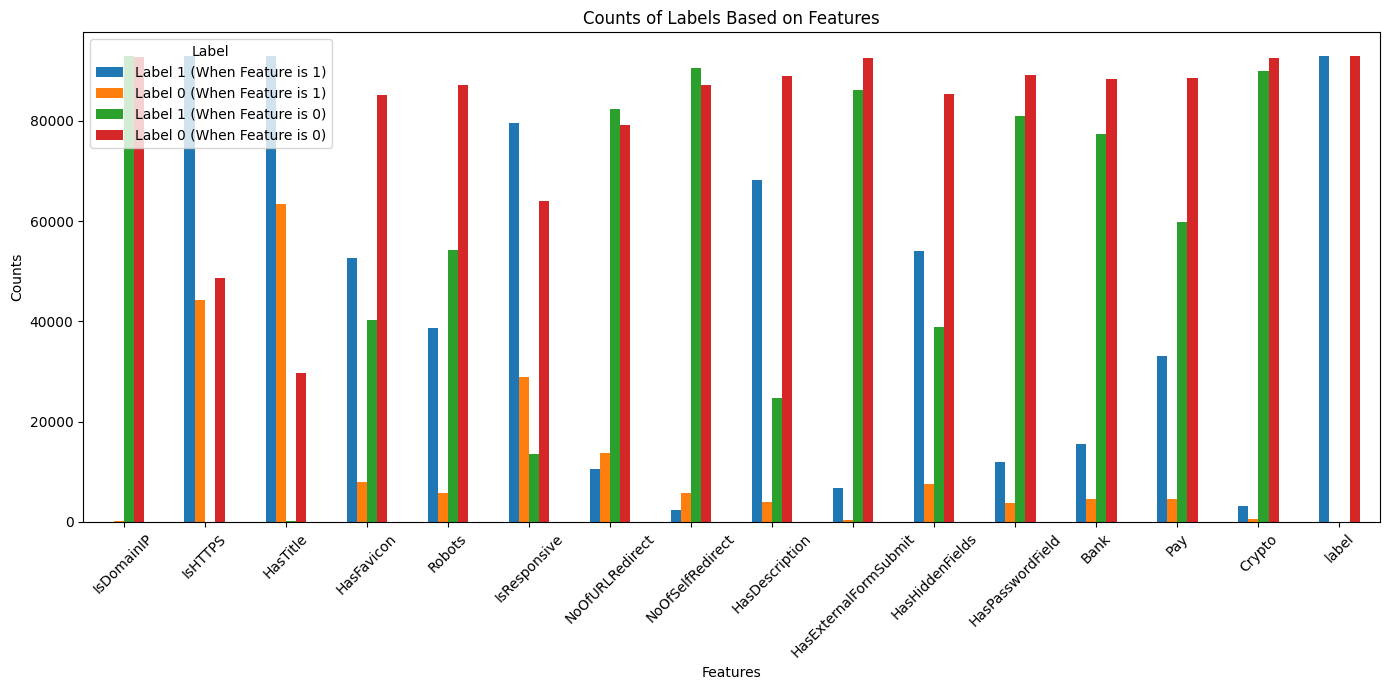

In [13]:
results_df.set_index('Feature', inplace=True)

results_df[['When_1_Label_1', 'When_1_Label_0', 'When_0_Label_1', 'When_0_Label_0']].plot(kind='bar', figsize=(14, 7))

plt.title('Counts of Labels Based on Features')
plt.xlabel('Features')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Label 1 (When Feature is 1)', 'Label 0 (When Feature is 1)',
                                    'Label 1 (When Feature is 0)', 'Label 0 (When Feature is 0)'])
plt.tight_layout()
plt.show()

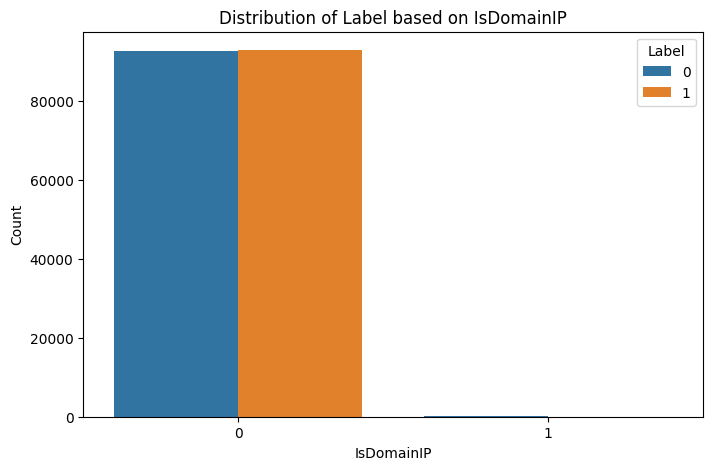

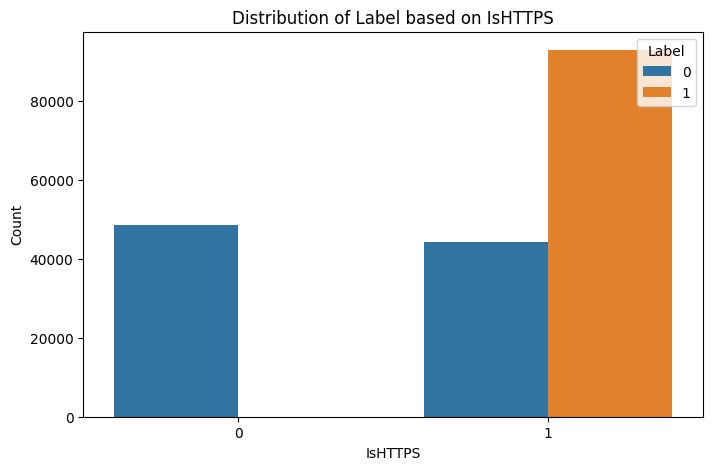

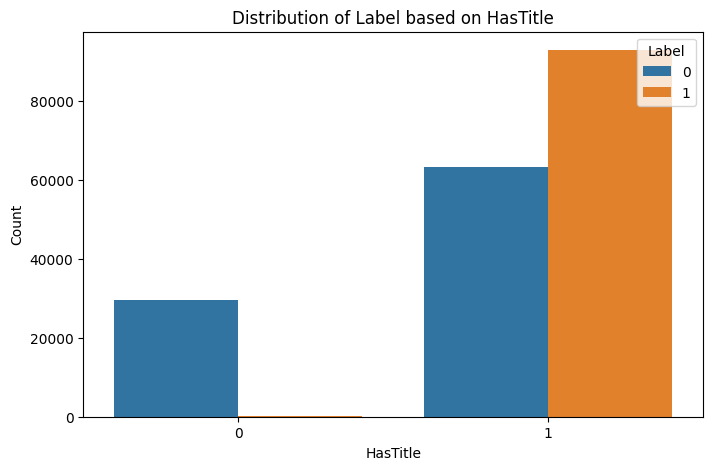

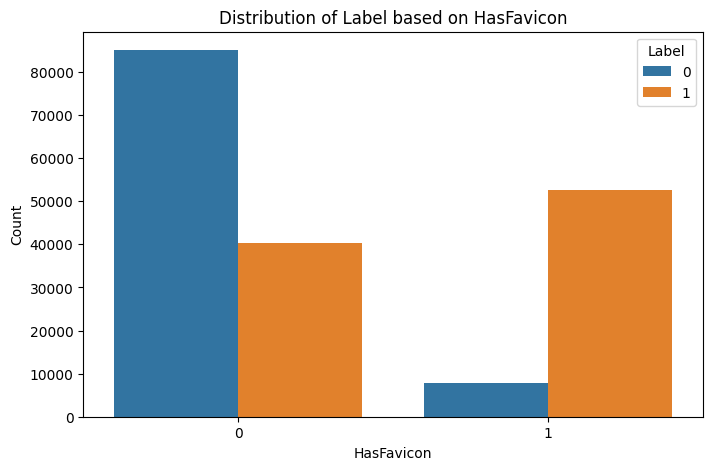

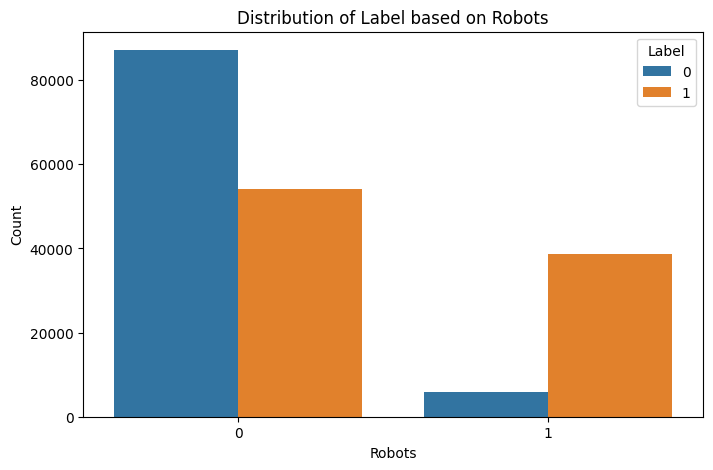

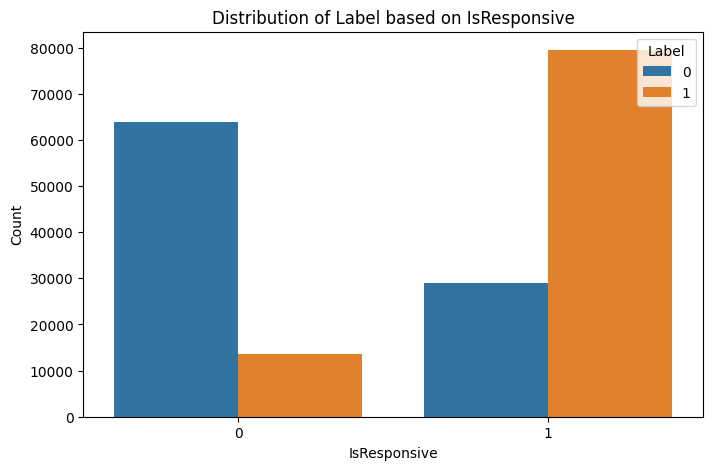

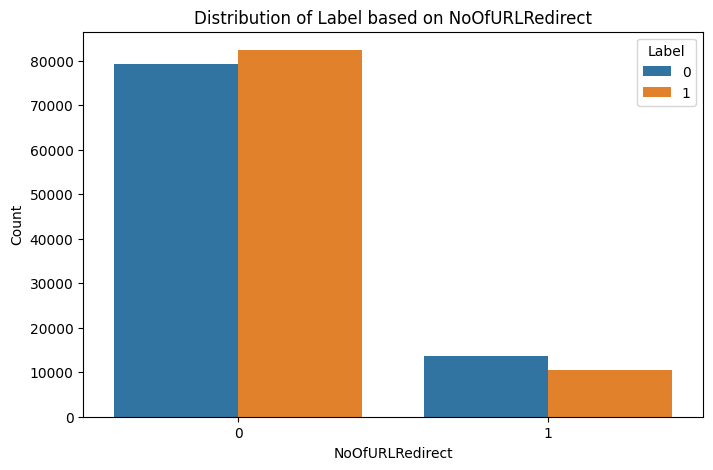

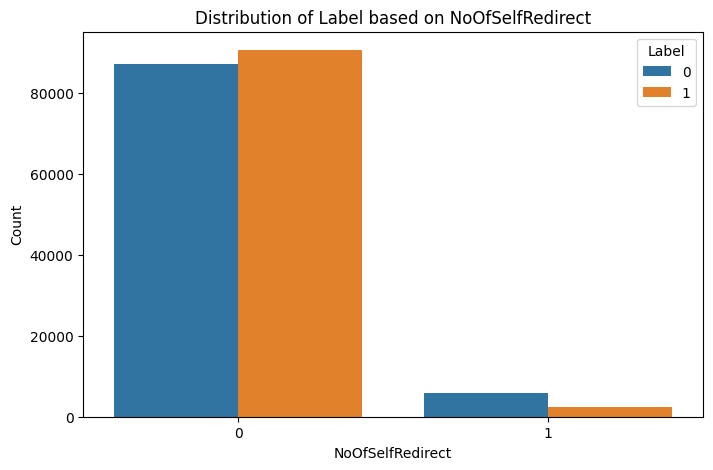

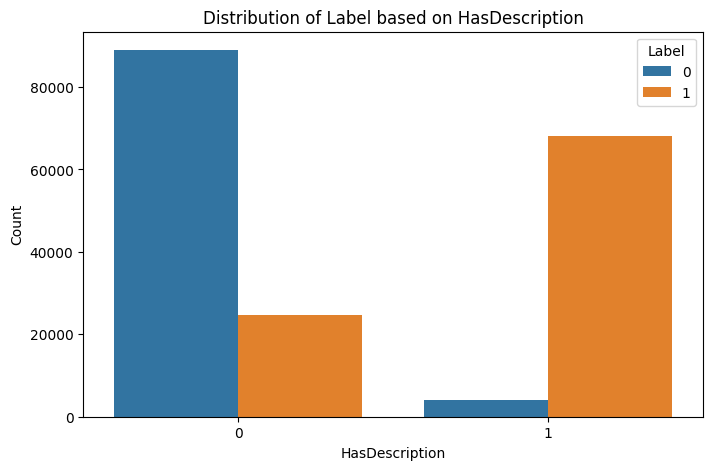

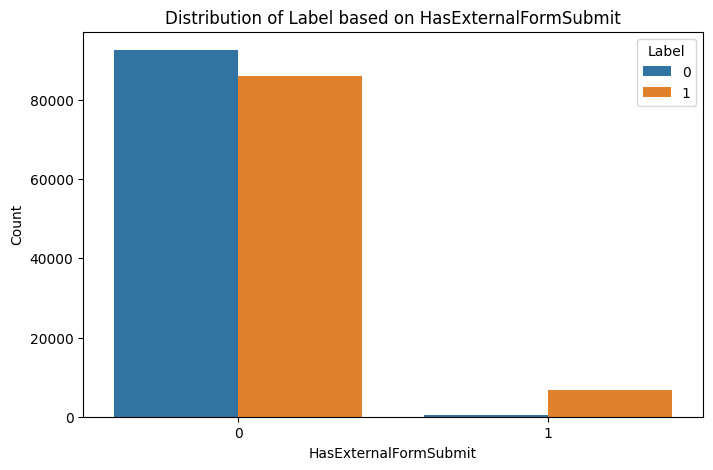

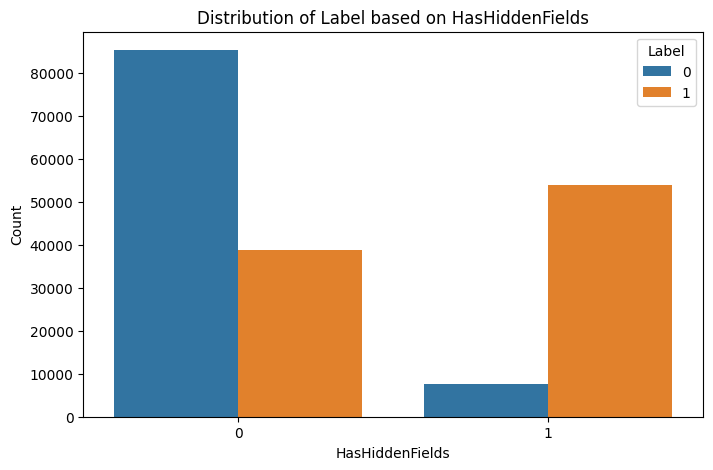

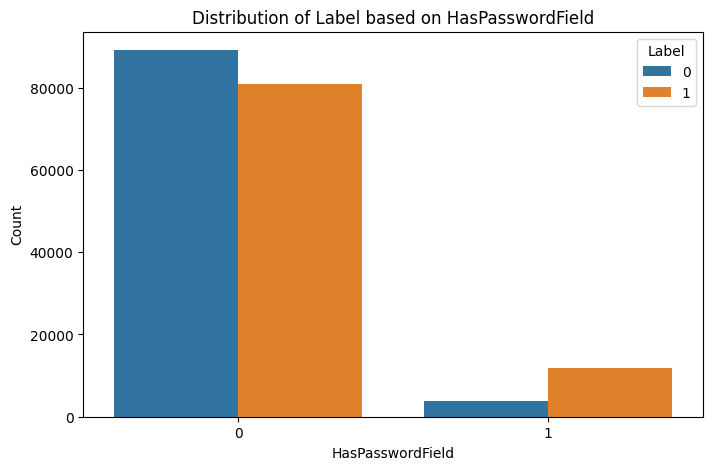

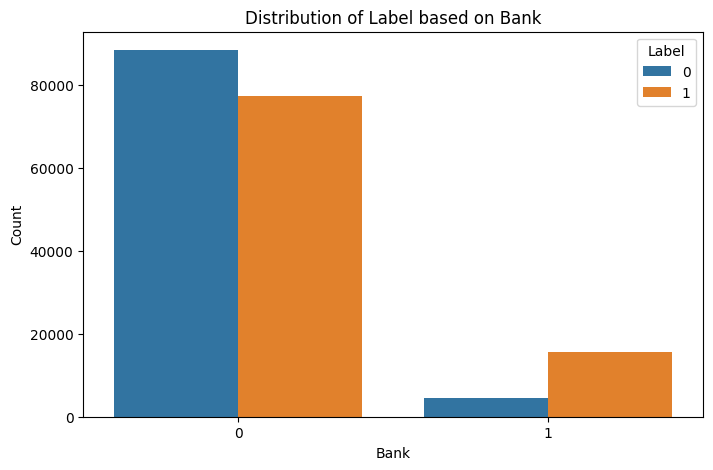

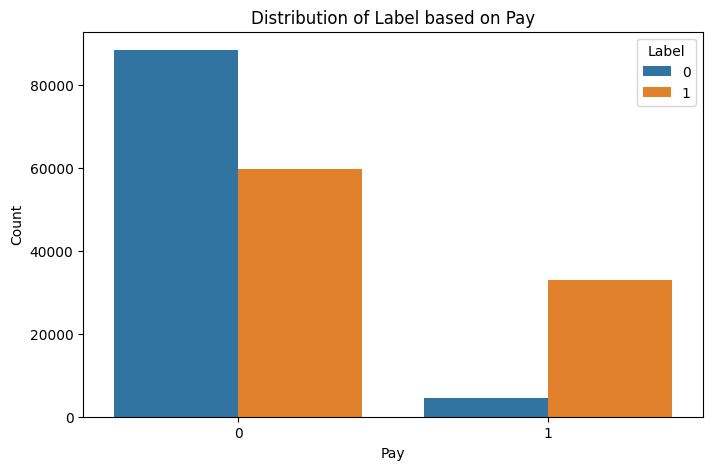

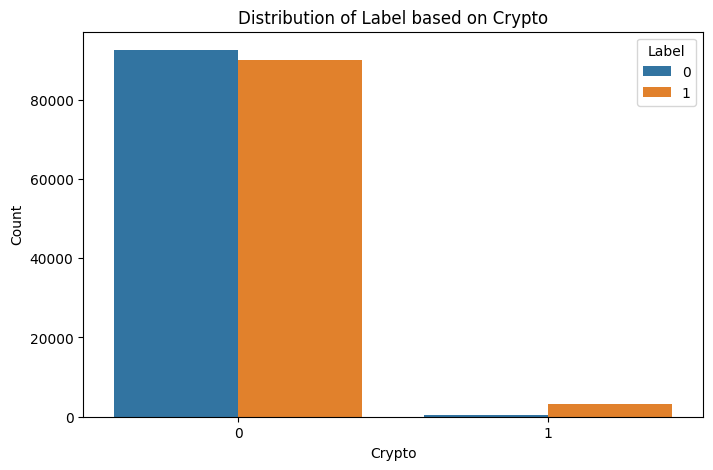

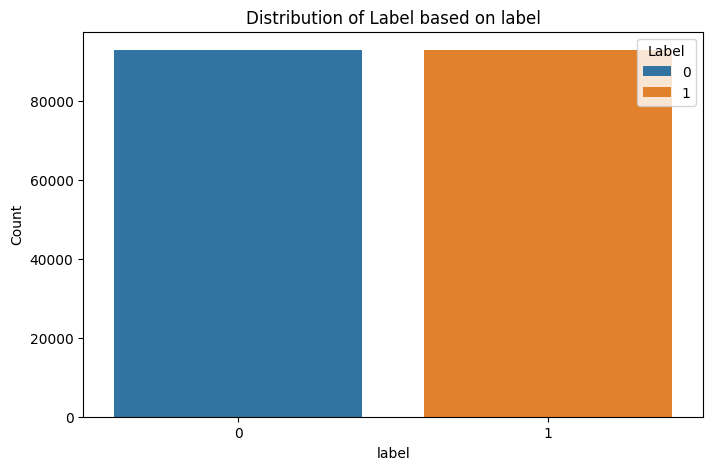

In [14]:

for feature in two_unique_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue='label')
    plt.title(f'Distribution of Label based on {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Label', loc='upper right', labels=['0', '1'])
    plt.show()


In [15]:
two_unique_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()




In [16]:


chi2_results = []

for feature in two_unique_features:
    contingency_table = pd.crosstab(df[feature], df['label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': feature, 'Chi2': chi2, 'p-value': p})

chi2_results_df = pd.DataFrame(chi2_results)

chi2_results_df


,Feature,Chi2,p-value
0,URLLength,44483.607900,0.000000e+00
1,DomainLength,24789.918708,0.000000e+00
2,IsDomainIP,191.203645,1.736223e-43
3,TLD,53462.203008,0.000000e+00
4,TLDLength,3165.769829,0.000000e+00
5,NoOfSubDomain,17236.137987,0.000000e+00
6,NoOfLettersInURL,40674.279269,0.000000e+00
7,NoOfDegitsInURL,46210.240773,0.000000e+00
8,NoOfEqualsInURL,3489.272115,0.000000e+00
9,NoOfQMarkInURL,4155.854845,0.000000e+00


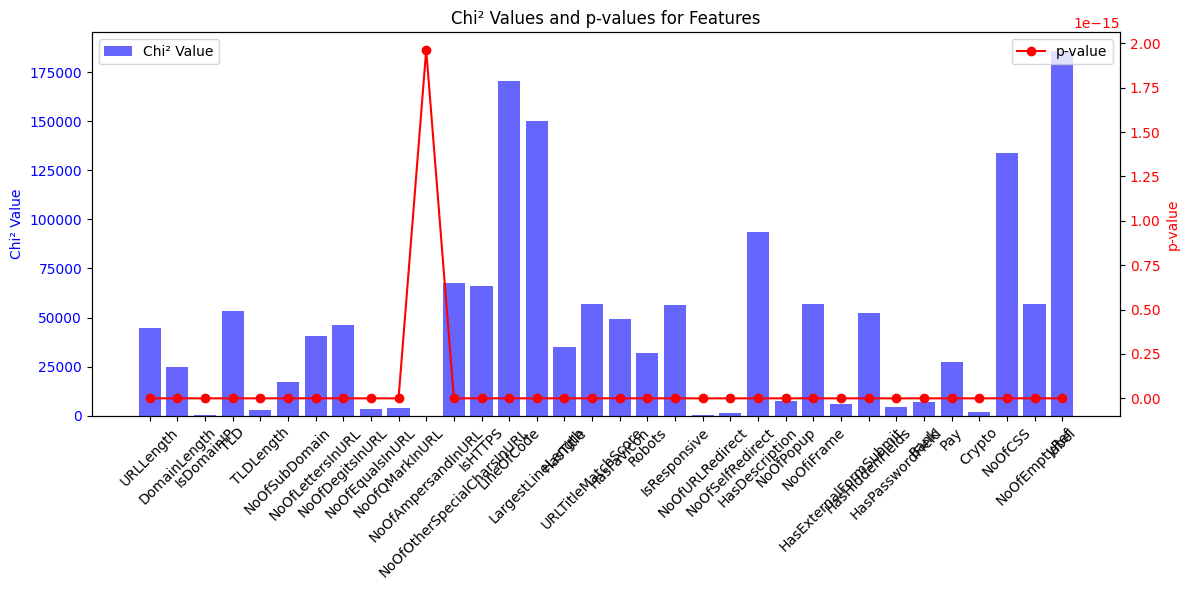

In [17]:
chi2_results_df.set_index('Feature', inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(chi2_results_df.index, chi2_results_df['Chi2'], color='b', alpha=0.6, label='Chi² Value')
ax1.set_ylabel('Chi² Value', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(chi2_results_df.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(chi2_results_df.index, chi2_results_df['p-value'], color='r', marker='o', label='p-value')
ax2.set_ylabel('p-value', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Chi² Values and p-values for Features')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [18]:

variance_test_results = []

for feature in two_unique_features:
    if feature in df.columns:
        population_variance = np.var(df[feature].dropna(), ddof=0)  
        
        sample_data = df[feature].dropna().sample(n=10000, random_state=42, replace=False)
        
        n = len(sample_data)
        
        s_squared = np.var(sample_data, ddof=1)  
        
        chi_squared_statistic = (n - 1) * s_squared / population_variance
        
        df_value = n - 1
        
        critical_value_low = stats.chi2.ppf(0.025, df_value)
        critical_value_high = stats.chi2.ppf(0.975, df_value)
        
        significant = (chi_squared_statistic < critical_value_low) or (chi_squared_statistic > critical_value_high)
        
        variance_test_results.append({
            'Feature': feature,
            'Population Variance': population_variance,
            'Sample Variance': s_squared,
            'Chi-squared Statistic': chi_squared_statistic,
            'Degrees of Freedom': df_value,
            'Critical Value Low': critical_value_low,
            'Critical Value High': critical_value_high,
            'Reject H0': significant
        })

results_df = pd.DataFrame(variance_test_results)

print(results_df)


                       Feature  Population Variance  Sample Variance  \
0                    URLLength         3.086962e+02     3.107246e+02   
1                 DomainLength         6.145433e+01     6.105017e+01   
2                   IsDomainIP         1.036892e-03     7.994399e-04   
3                          TLD         8.559127e+03     8.579127e+03   
4                    TLDLength         2.565835e-01     2.555339e-01   
5                NoOfSubDomain         3.526515e-01     3.493530e-01   
6             NoOfLettersInURL         2.016353e+02     2.026340e+02   
7              NoOfDegitsInURL         1.764977e+01     1.845998e+01   
8              NoOfEqualsInURL         6.283352e-02     6.959572e-02   
9               NoOfQMarkInURL         2.382486e-02     2.455021e-02   
10          NoOfAmpersandInURL         2.204253e-03     1.600000e-03   
11  NoOfOtherSpecialCharsInURL         4.304552e+00     4.089768e+00   
12                     IsHTTPS         1.931323e-01     1.930893

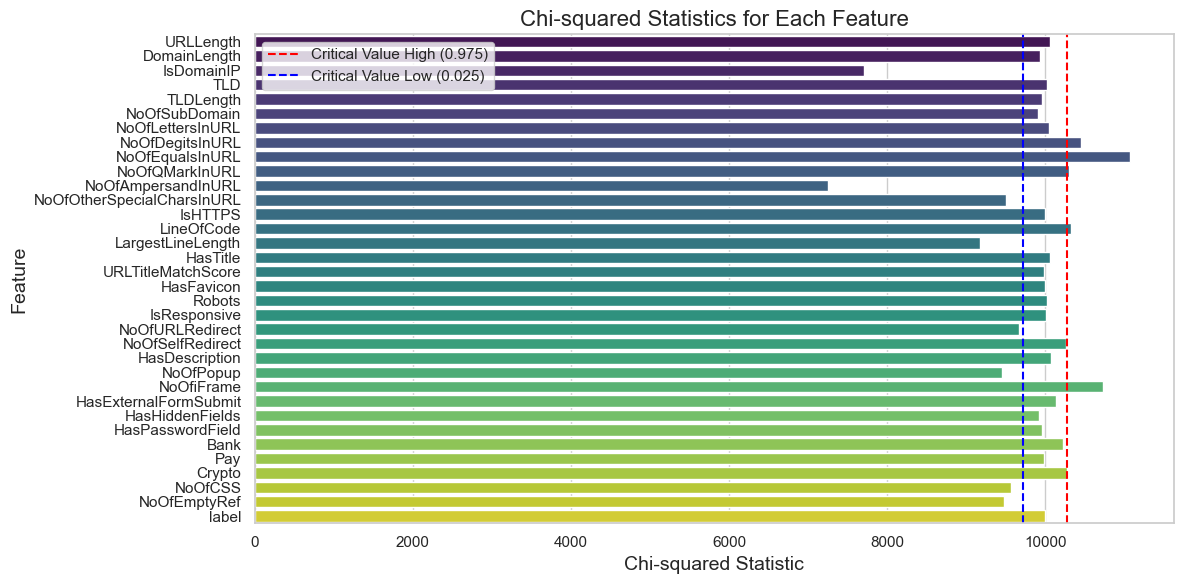

In [19]:


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Chi-squared Statistic', y='Feature', data=results_df, palette='viridis')

plt.axvline(x=results_df['Critical Value High'].max(), color='red', linestyle='--', label='Critical Value High (0.975)')
plt.axvline(x=results_df['Critical Value Low'].min(), color='blue', linestyle='--', label='Critical Value Low (0.025)')

plt.title('Chi-squared Statistics for Each Feature', fontsize=16)
plt.xlabel('Chi-squared Statistic', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()


In [20]:


sample_size = 10000  
results = {}

for feature in two_unique_features:
    sample_x = df[feature].dropna().sample(n=sample_size, random_state=42)
    sample_y = df['label'].dropna().sample(n=sample_size, random_state=42)
    
    r, _ = stats.pearsonr(sample_x, sample_y)
    
    n = sample_size
    t_statistic = (r * np.sqrt(n - 2)) / np.sqrt(1 - r**2)
    
    dof = n - 2
    
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), dof))
    
    results[feature] = {
        'Correlation Coefficient': r,
        'T-statistic': t_statistic,
        'P-value': p_value
    }

results_df = pd.DataFrame(results).T
print(results_df)


                            Correlation Coefficient  T-statistic       P-value
URLLength                                 -0.369974   -39.819173  0.000000e+00
DomainLength                              -0.265494   -27.534953  0.000000e+00
IsDomainIP                                -0.028460    -2.846887  4.423895e-03
TLD                                        0.061418     6.152771  7.905914e-10
TLDLength                                 -0.049026    -4.907975  9.347511e-07
NoOfSubDomain                              0.015462     1.546187  1.220910e-01
NoOfLettersInURL                          -0.375861   -40.556056  0.000000e+00
NoOfDegitsInURL                           -0.337425   -35.841126  0.000000e+00
NoOfEqualsInURL                           -0.121249   -12.213752  0.000000e+00
NoOfQMarkInURL                            -0.150862   -15.259376  0.000000e+00
NoOfAmpersandInURL                        -0.010059    -1.005818  3.145277e-01
NoOfOtherSpecialCharsInURL                -0.517569 

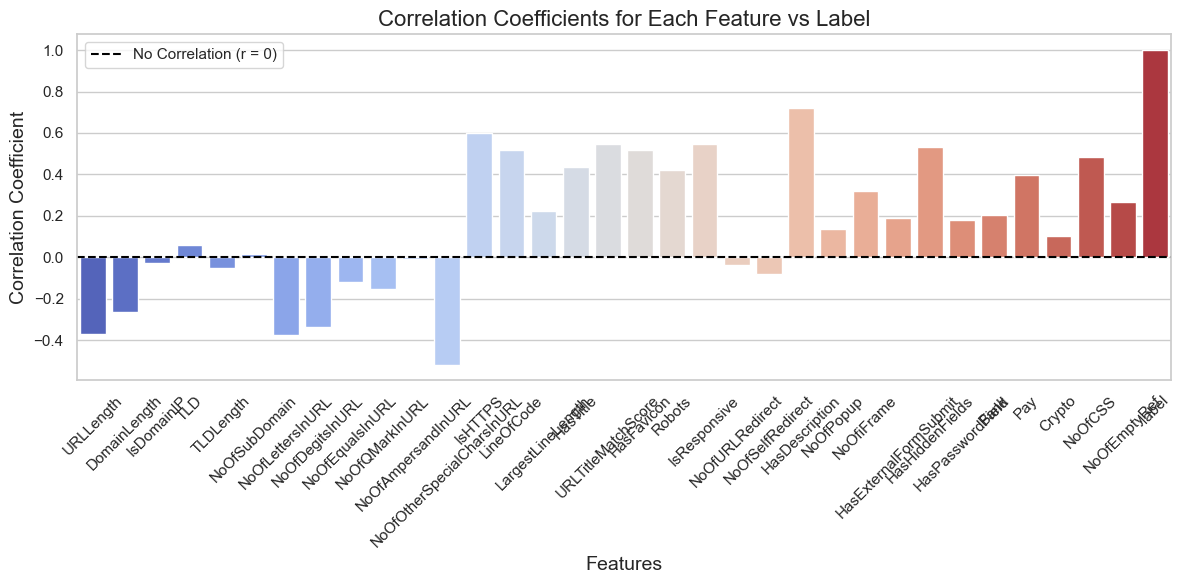

In [21]:
plt.figure(figsize=(12, 6))

sns.barplot(x=results_df.index, y='Correlation Coefficient', data=results_df, palette='coolwarm')
plt.axhline(y=0, color='black', linestyle='--', label='No Correlation (r = 0)')
plt.title('Correlation Coefficients for Each Feature vs Label', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [22]:


alpha = 0.05

results = []

for feature in two_unique_features:
    sample1 = df[feature].dropna().sample(n=10000, random_state=42)
    sample2 = df['label'].dropna().sample(n=10000, random_state=42)

    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)
    std2 = np.std(sample2, ddof=1)

    z_statistic = (mean1 - mean2) / np.sqrt((std1**2 / 10000) + (std2**2 / 10000))

    results.append({
        'Feature': feature,
        'Z-statistic': z_statistic
    })

results_df = pd.DataFrame(results)

results_df

,Feature,Z-statistic
0,URLLength,182.165361
1,DomainLength,264.419802
2,IsDomainIP,-100.256508
3,TLD,251.652027
4,TLDLength,314.364938
5,NoOfSubDomain,83.403340
6,NoOfLettersInURL,124.058043
7,NoOfDegitsInURL,22.862069
8,NoOfEqualsInURL,-83.329995
9,NoOfQMarkInURL,-91.490083


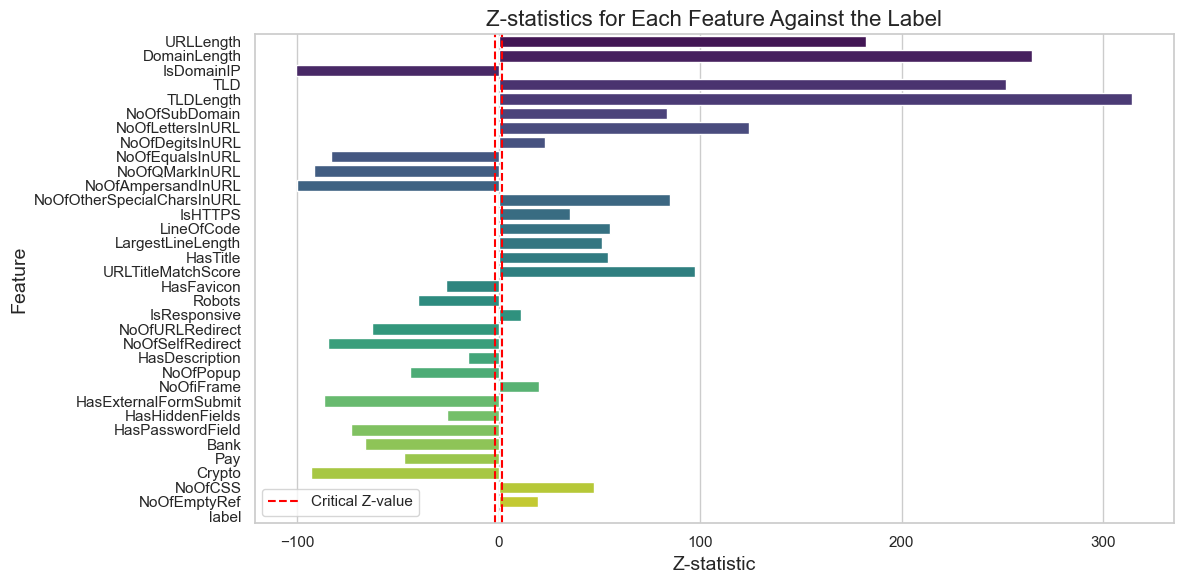

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Z-statistic', y='Feature', data=results_df, palette='viridis')
plt.axvline(x=stats.norm.ppf(1 - alpha/2), color='red', linestyle='--', label='Critical Z-value')
plt.axvline(x=-stats.norm.ppf(1 - alpha/2), color='red', linestyle='--')

plt.title('Z-statistics for Each Feature Against the Label', fontsize=16)
plt.xlabel('Z-statistic', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()

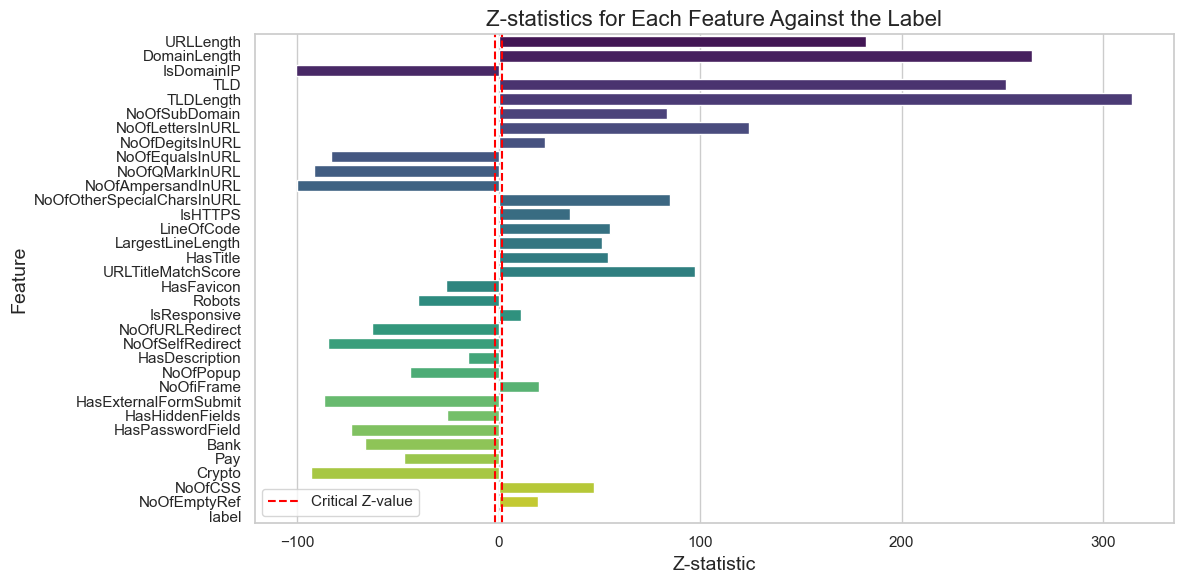

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Z-statistic', y='Feature', data=results_df, palette='viridis')
plt.axvline(x=stats.norm.ppf(1 - alpha/2), color='red', linestyle='--', label='Critical Z-value')
plt.axvline(x=-stats.norm.ppf(1 - alpha/2), color='red', linestyle='--')

plt.title('Z-statistics for Each Feature Against the Label', fontsize=16)
plt.xlabel('Z-statistic', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()


In [25]:

alpha = 0.05

results = []

for feature in two_unique_features:
    sample_size = 10000
    sample1 = df[feature].dropna().sample(n=sample_size, random_state=42)
    sample2 = df['label'].dropna().sample(n=sample_size, random_state=42)

    p1_success_count = np.sum(sample1)
    p2_success_count = np.sum(sample2)

    p1 = p1_success_count / sample_size
    p2 = p2_success_count / sample_size

    p_combined = (p1_success_count + p2_success_count) / (2 * sample_size)
    se = np.sqrt(p_combined * (1 - p_combined) * (1/sample_size + 1/sample_size))

    z_statistic = (p1 - p2) / se

    results.append({
        'Feature': feature,
        'Z-statistic': z_statistic,
        'p1': p1,
        'p2': p2
    })

results_df = pd.DataFrame(results)

results_df

,Feature,Z-statistic,p1,p2
0,URLLength,NaN,32.626800,0.5029
1,DomainLength,NaN,21.205500,0.5029
2,IsDomainIP,-81.791826,0.000800,0.5029
3,TLD,NaN,233.595400,0.5029
4,TLDLength,NaN,2.738100,0.5029
5,NoOfSubDomain,120.366354,1.148600,0.5029
6,NoOfLettersInURL,NaN,18.173400,0.5029
7,NoOfDegitsInURL,1360.162027,1.491800,0.5029
8,NoOfEqualsInURL,-75.267889,0.031800,0.5029
9,NoOfQMarkInURL,-76.977762,0.023500,0.5029


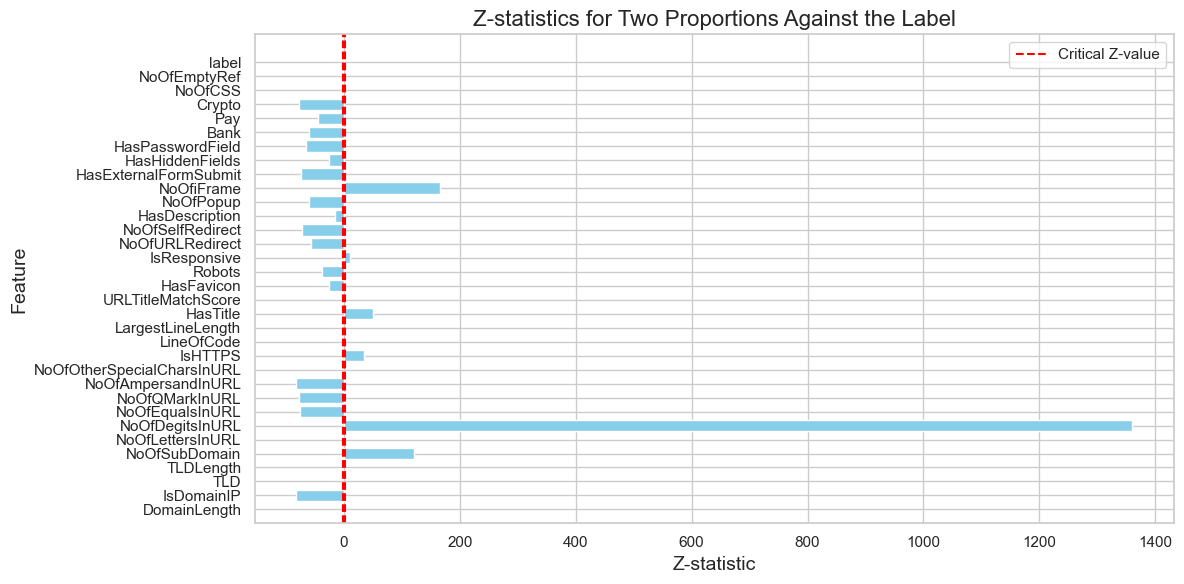

In [26]:
plt.figure(figsize=(12, 6))
plt.barh(results_df['Feature'], results_df['Z-statistic'], color='skyblue')
plt.axvline(x=stats.norm.ppf(1 - alpha/2), color='red', linestyle='--', label='Critical Z-value')
plt.axvline(x=-stats.norm.ppf(1 - alpha/2), color='red', linestyle='--')

plt.title('Z-statistics for Two Proportions Against the Label', fontsize=16)
plt.xlabel('Z-statistic', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:


alpha = 0.05
sample_size = 10000

results = []

for feature in two_unique_features:
    sample1 = df[feature].dropna().sample(n=sample_size, random_state=42)
    sample2 = df['label'].dropna().sample(n=sample_size, random_state=42)

    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    n1 = len(sample1)
    n2 = len(sample2)

    pooled_variance = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    t_statistic = (mean1 - mean2) / np.sqrt(pooled_variance * (1/n1 + 1/n2))
    dof = n1 + n2 - 2

    results.append({
        'Feature': feature,
        'T-statistic': t_statistic,
        'Mean1': mean1,
        'Mean2': mean2,
        'P-value': stats.t.sf(np.abs(t_statistic), dof) * 2  # two-tailed
    })

results_df = pd.DataFrame(results)

results_df

    


,Feature,T-statistic,Mean1,Mean2,P-value
0,URLLength,182.165361,32.626800,0.5029,0.000000e+00
1,DomainLength,264.419802,21.205500,0.5029,0.000000e+00
2,IsDomainIP,-100.256508,0.000800,0.5029,0.000000e+00
3,TLD,251.652027,233.595400,0.5029,0.000000e+00
4,TLDLength,314.364938,2.738100,0.5029,0.000000e+00
5,NoOfSubDomain,83.403340,1.148600,0.5029,0.000000e+00
6,NoOfLettersInURL,124.058043,18.173400,0.5029,0.000000e+00
7,NoOfDegitsInURL,22.862069,1.491800,0.5029,3.222439e-114
8,NoOfEqualsInURL,-83.329995,0.031800,0.5029,0.000000e+00
9,NoOfQMarkInURL,-91.490083,0.023500,0.5029,0.000000e+00


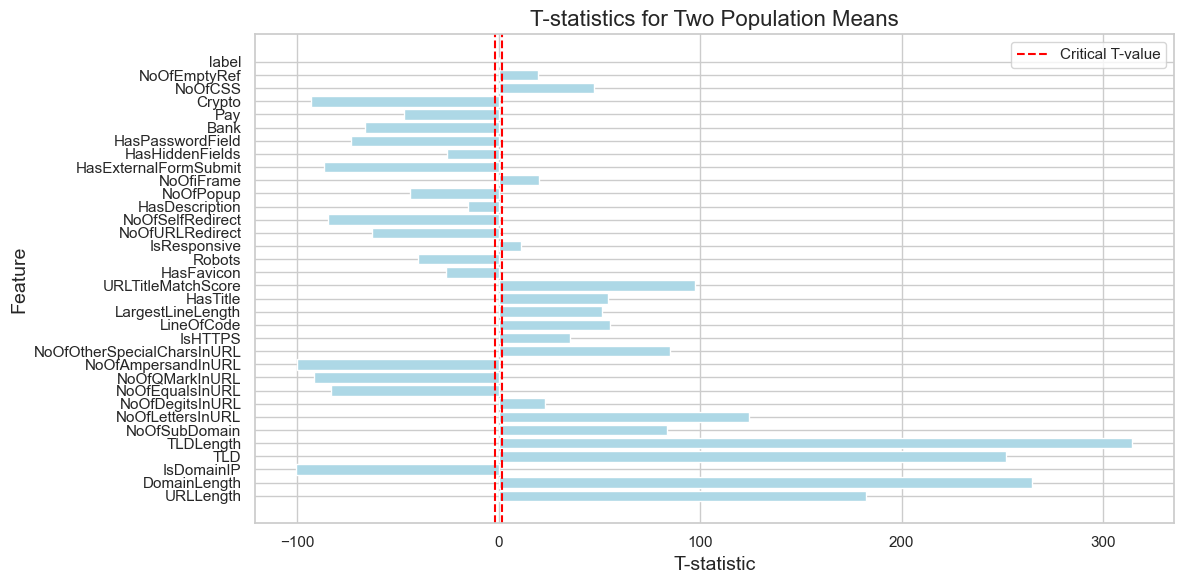

                       Feature  T-statistic        Mean1   Mean2  \
0                    URLLength   182.165361    32.626800  0.5029   
1                 DomainLength   264.419802    21.205500  0.5029   
2                   IsDomainIP  -100.256508     0.000800  0.5029   
3                          TLD   251.652027   233.595400  0.5029   
4                    TLDLength   314.364938     2.738100  0.5029   
5                NoOfSubDomain    83.403340     1.148600  0.5029   
6             NoOfLettersInURL   124.058043    18.173400  0.5029   
7              NoOfDegitsInURL    22.862069     1.491800  0.5029   
8              NoOfEqualsInURL   -83.329995     0.031800  0.5029   
9               NoOfQMarkInURL   -91.490083     0.023500  0.5029   
10          NoOfAmpersandInURL  -100.176632     0.000400  0.5029   
11  NoOfOtherSpecialCharsInURL    85.257644     2.279000  0.5029   
12                     IsHTTPS    35.408359     0.738600  0.5029   
13                  LineOfCode    55.476533   83

In [28]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
plt.barh(results_df['Feature'], results_df['T-statistic'], color='lightblue')
plt.axvline(x=stats.t.ppf(1 - alpha/2, dof), color='red', linestyle='--', label='Critical T-value')
plt.axvline(x=-stats.t.ppf(1 - alpha/2, dof), color='red', linestyle='--')

plt.title('T-statistics for Two Population Means', fontsize=16)
plt.xlabel('T-statistic', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

print(results_df)

In [29]:


alpha = 0.05
sample_size = 10000

results = []

for feature in two_unique_features:
    sample1 = df[feature].dropna().sample(n=sample_size, random_state=42)
    sample2 = df['label'].dropna().sample(n=sample_size, random_state=42)

    differences = sample1 - sample2
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)
    n = len(differences)

    t_statistic = mean_diff / (std_diff / np.sqrt(n))
    dof = n - 1
    p_value = stats.t.sf(np.abs(t_statistic), dof) * 2  # two-tailed

    results.append({
        'Feature': feature,
        'T-statistic': t_statistic,
        'Mean Difference': mean_diff,
        'P-value': p_value
    })

results_df = pd.DataFrame(results)



print(results_df)


                       Feature  T-statistic  Mean Difference        P-value
0                    URLLength   180.284668        32.123900   0.000000e+00
1                 DomainLength   260.056052        20.702600   0.000000e+00
2                   IsDomainIP  -100.096062        -0.502100   0.000000e+00
3                          TLD   251.735503       233.092500   0.000000e+00
4                    TLDLength   306.931637         2.235200   0.000000e+00
5                NoOfSubDomain    84.046561         0.645700   0.000000e+00
6             NoOfLettersInURL   122.453849        17.670500   0.000000e+00
7              NoOfDegitsInURL    22.024667         0.988900  5.113085e-105
8              NoOfEqualsInURL   -79.449049        -0.471100   0.000000e+00
9               NoOfQMarkInURL   -87.789027        -0.479400   0.000000e+00
10          NoOfAmpersandInURL  -100.096632        -0.502500   0.000000e+00
11  NoOfOtherSpecialCharsInURL    76.526840         1.776100   0.000000e+00
12          

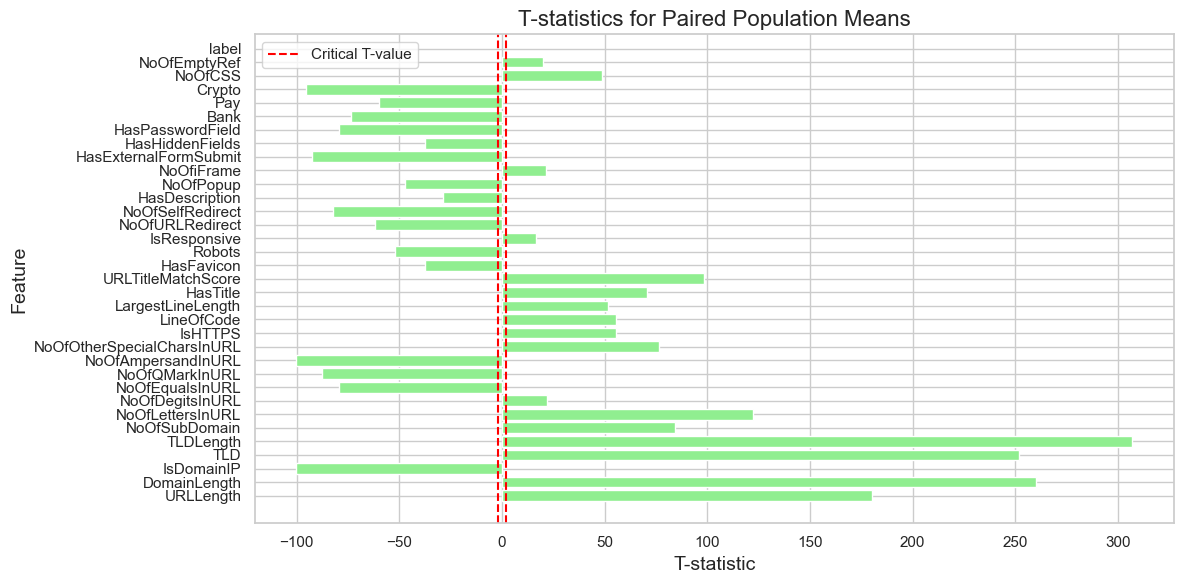

In [30]:
plt.figure(figsize=(12, 6))
plt.barh(results_df['Feature'], results_df['T-statistic'], color='lightgreen')
plt.axvline(x=stats.t.ppf(1 - alpha/2, dof), color='red', linestyle='--', label='Critical T-value')
plt.axvline(x=-stats.t.ppf(1 - alpha/2, dof), color='red', linestyle='--')

plt.title('T-statistics for Paired Population Means', fontsize=16)
plt.xlabel('T-statistic', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:

p0 = 0.5  
sample_size = 10000  
results = {}

for feature in two_unique_features:
    sample = df[feature].dropna().sample(n=sample_size, random_state=42)
    
    p_hat = np.mean(sample)  
    n = len(sample)
    
    z_statistic = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)
    
    p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
    
    results[feature] = {
        'Sample Proportion': p_hat,
        'Z-statistic': z_statistic,
        'P-value': p_value
    }

results_df = pd.DataFrame(results).T
print(results_df)


                            Sample Proportion    Z-statistic   P-value
URLLength                           32.626800    6425.360000  0.000000
DomainLength                        21.205500    4141.100000  0.000000
IsDomainIP                           0.000800     -99.840000  0.000000
TLD                                233.595400   46619.080000  0.000000
TLDLength                            2.738100     447.620000  0.000000
NoOfSubDomain                        1.148600     129.720000  0.000000
NoOfLettersInURL                    18.173400    3534.680000  0.000000
NoOfDegitsInURL                      1.491800     198.360000  0.000000
NoOfEqualsInURL                      0.031800     -93.640000  0.000000
NoOfQMarkInURL                       0.023500     -95.300000  0.000000
NoOfAmpersandInURL                   0.000400     -99.920000  0.000000
NoOfOtherSpecialCharsInURL           2.279000     355.800000  0.000000
IsHTTPS                              0.738600      47.720000  0.000000
LineOf

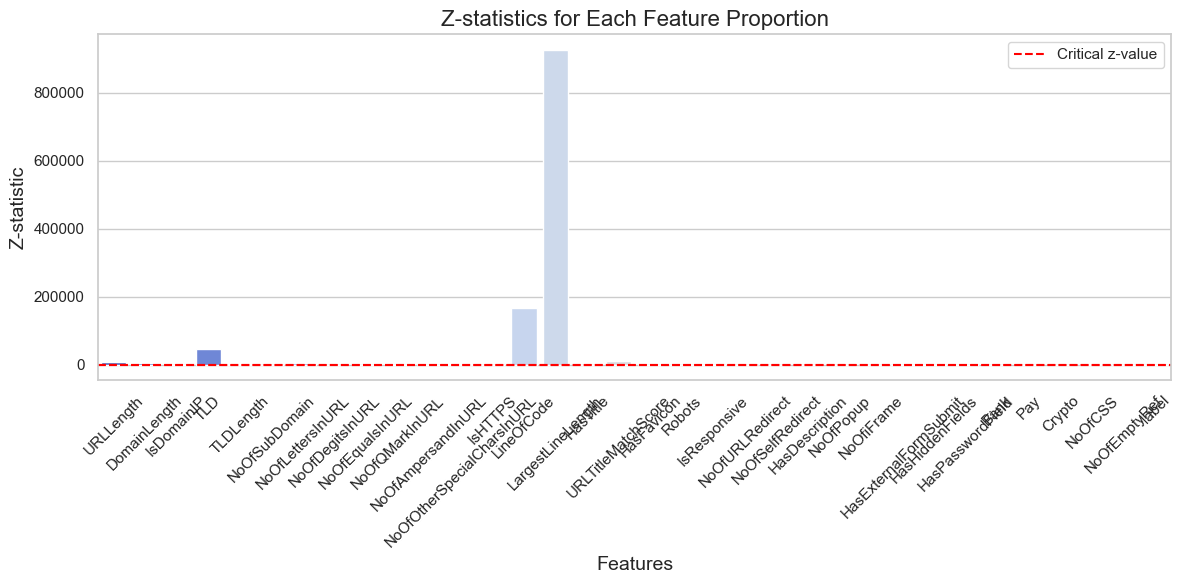

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='Z-statistic', data=results_df, palette='coolwarm')


critical_z_value = stats.norm.ppf(1 - 0.025) 
plt.axhline(y=critical_z_value, color='red', linestyle='--', label='Critical z-value')
plt.axhline(y=-critical_z_value, color='red', linestyle='--')

plt.title('Z-statistics for Each Feature Proportion', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Z-statistic', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:

mu_0 = 0.5  
sample_size = 10000  
results = {}

for feature in two_unique_features:
    sample = df[feature].dropna().sample(n=sample_size, random_state=42)
    
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  
    n = len(sample)
    
    t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
    
    dof = n - 1
    
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), dof))
    
    results[feature] = {
        'Sample Mean': sample_mean,
        'T-statistic': t_statistic,
        'P-value': p_value
    }

results_df = pd.DataFrame(results).T
print(results_df)


                            Sample Mean  T-statistic   P-value
URLLength                     32.626800   182.255085  0.000000
DomainLength                  21.205500   264.997799  0.000000
IsDomainIP                     0.000800 -1765.556641  0.000000
TLD                          233.595400   251.658825  0.000000
TLDLength                      2.738100   442.746553  0.000000
NoOfSubDomain                  1.148600   109.734887  0.000000
NoOfLettersInURL              18.173400   124.154925  0.000000
NoOfDegitsInURL                1.491800    23.083864  0.000000
NoOfEqualsInURL                0.031800  -177.476210  0.000000
NoOfQMarkInURL                 0.023500  -304.113251  0.000000
NoOfAmpersandInURL             0.000400 -1249.000000  0.000000
NoOfOtherSpecialCharsInURL     2.279000    87.968384  0.000000
IsHTTPS                        0.738600    54.298931  0.000000
LineOfCode                   839.900800    55.476728  0.000000
LargestLineLength           4624.976400    51.422779  0

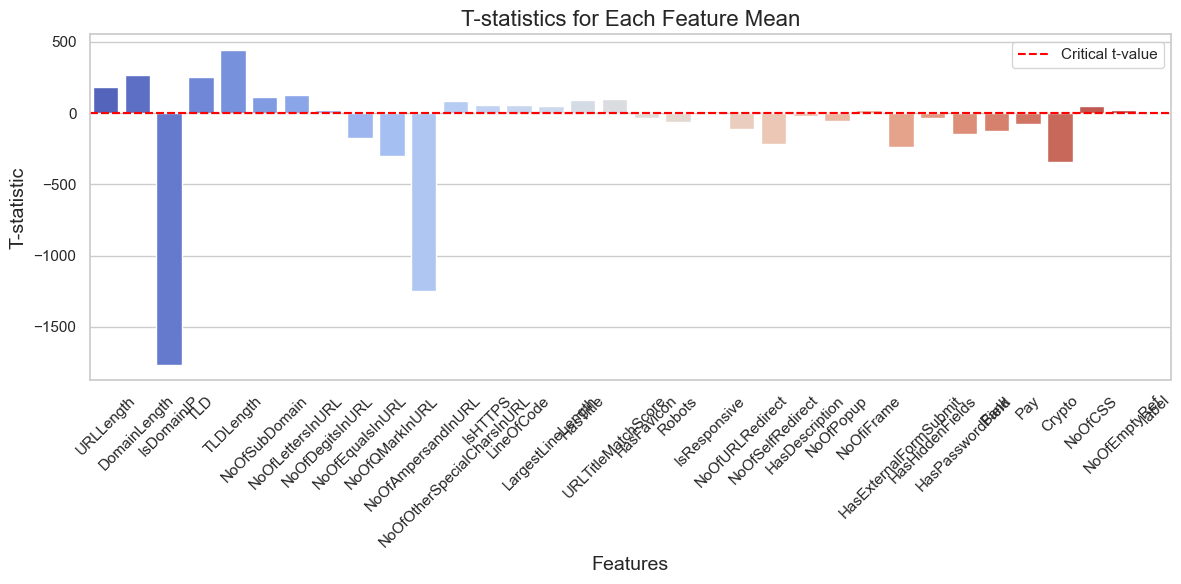

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='T-statistic', data=results_df, palette='coolwarm')

critical_t_value = stats.t.ppf(1 - 0.025, dof)  
plt.axhline(y=critical_t_value, color='red', linestyle='--', label='Critical t-value')
plt.axhline(y=-critical_t_value, color='red', linestyle='--')

plt.title('T-statistics for Each Feature Mean', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('T-statistic', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [35]:


sample_size_1 = 10000 
sample_size_2 = 10000 
results = {}

for feature in two_unique_features:
    sample1 = df[feature].dropna().sample(n=sample_size_1, random_state=42)
    sample2 = df['label'].dropna().sample(n=sample_size_2, random_state=42)
    
    s1_squared = np.var(sample1, ddof=1)
    s2_squared = np.var(sample2, ddof=1)
    
    F_statistic = s1_squared / s2_squared
    
    df1 = sample_size_1 - 1
    df2 = sample_size_2 - 1
    
    p_value = 2 * min(stats.f.cdf(F_statistic, df1, df2), 1 - stats.f.cdf(F_statistic, df1, df2))
    
    results[feature] = {
        'Sample Variance 1': s1_squared,
        'Sample Variance 2': s2_squared,
        'F-statistic': F_statistic,
        'P-value': p_value
    }

results_df = pd.DataFrame(results).T
print(results_df)


                            Sample Variance 1  Sample Variance 2  \
URLLength                        3.107246e+02           0.250017   
DomainLength                     6.105017e+01           0.250017   
IsDomainIP                       7.994399e-04           0.250017   
TLD                              8.579127e+03           0.250017   
TLDLength                        2.555339e-01           0.250017   
NoOfSubDomain                    3.493530e-01           0.250017   
NoOfLettersInURL                 2.026340e+02           0.250017   
NoOfDegitsInURL                  1.845998e+01           0.250017   
NoOfEqualsInURL                  6.959572e-02           0.250017   
NoOfQMarkInURL                   2.455021e-02           0.250017   
NoOfAmpersandInURL               1.600000e-03           0.250017   
NoOfOtherSpecialCharsInURL       4.089768e+00           0.250017   
IsHTTPS                          1.930893e-01           0.250017   
LineOfCode                       2.289376e+06   

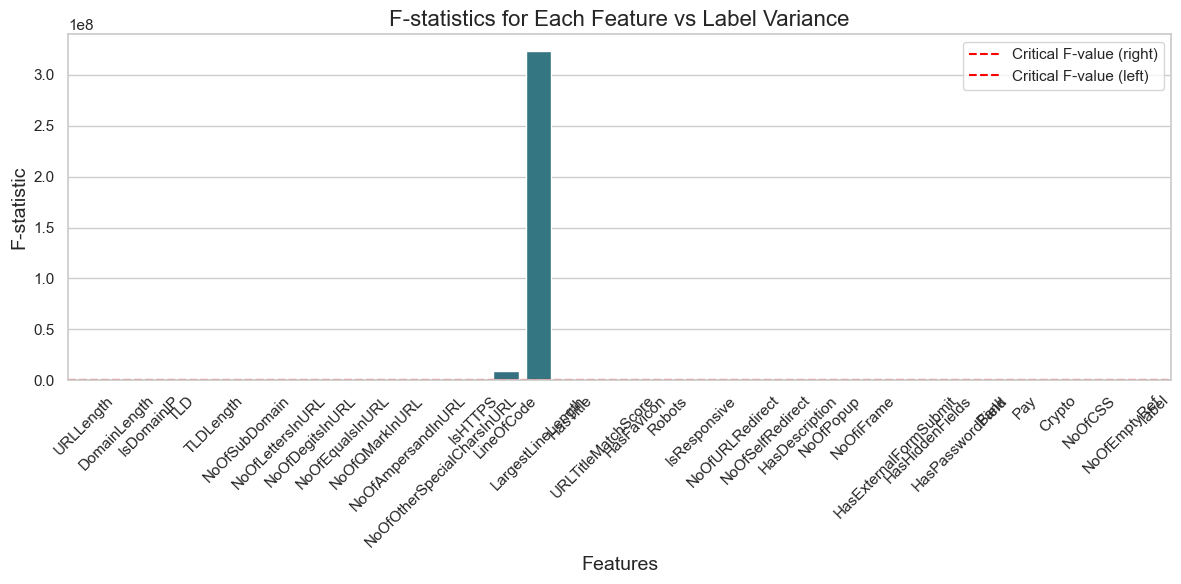

In [36]:
plt.figure(figsize=(12, 6))

sns.barplot(x=results_df.index, y='F-statistic', data=results_df, palette='viridis')
plt.axhline(y=stats.f.ppf(1 - 0.025, df1, df2), color='red', linestyle='--', label='Critical F-value (right)')
plt.axhline(y=stats.f.ppf(0.025, df1, df2), color='red', linestyle='--', label='Critical F-value (left)')
plt.title('F-statistics for Each Feature vs Label Variance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('F-statistic', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [37]:


results = []

for feature in two_unique_features:
    observed_frequencies = df[feature].value_counts()
    expected_frequencies = np.array([len(df) / len(observed_frequencies)] * len(observed_frequencies))
    
    chi2_statistic, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
    
    k = len(observed_frequencies)
    dof = k - 1
    
    results.append({
        'Feature': feature,
        'Chi-squared Statistic': chi2_statistic,
        'P-value': p_value,
        'Degrees of Freedom': dof
    })

results_df = pd.DataFrame(results)

print(results_df)



                       Feature  Chi-squared Statistic  P-value  \
0                    URLLength           1.383764e+06      0.0   
1                 DomainLength           2.758070e+05      0.0   
2                   IsDomainIP           1.851688e+05      0.0   
3                          TLD           2.098011e+07      0.0   
4                    TLDLength           1.161038e+05      0.0   
5                NoOfSubDomain           3.668370e+05      0.0   
6             NoOfLettersInURL           1.241498e+06      0.0   
7              NoOfDegitsInURL           5.284872e+06      0.0   
8              NoOfEqualsInURL           7.099630e+05      0.0   
9               NoOfQMarkInURL           7.039739e+05      0.0   
10          NoOfAmpersandInURL           7.430102e+05      0.0   
11  NoOfOtherSpecialCharsInURL           1.034113e+06      0.0   
12                     IsHTTPS           4.229589e+04      0.0   
13                  LineOfCode           3.513399e+07      0.0   
14        

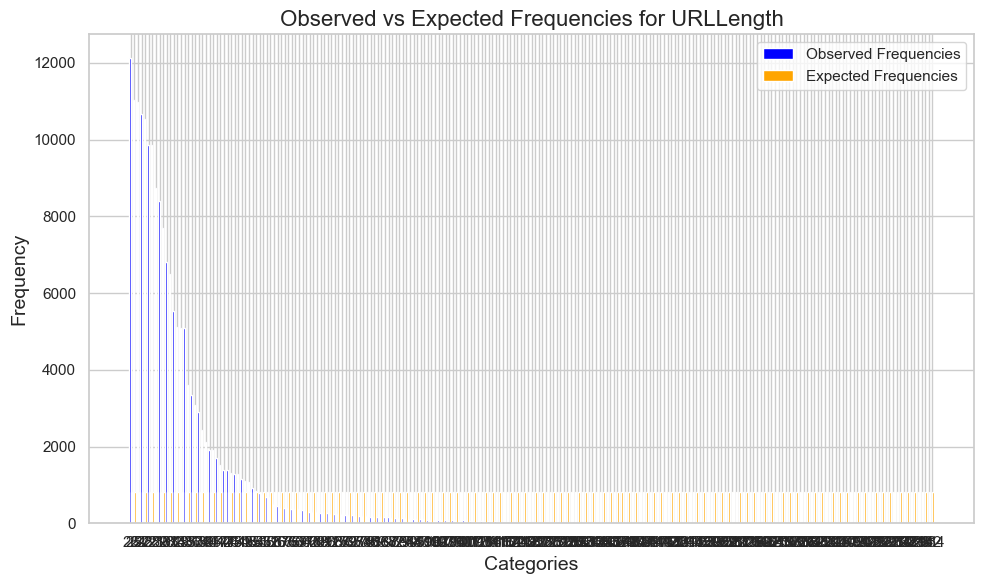

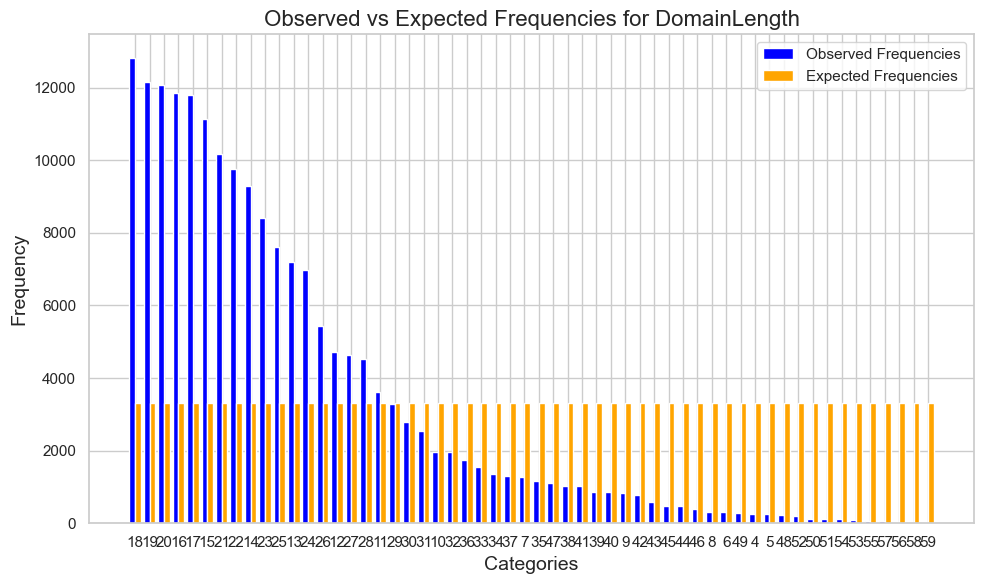

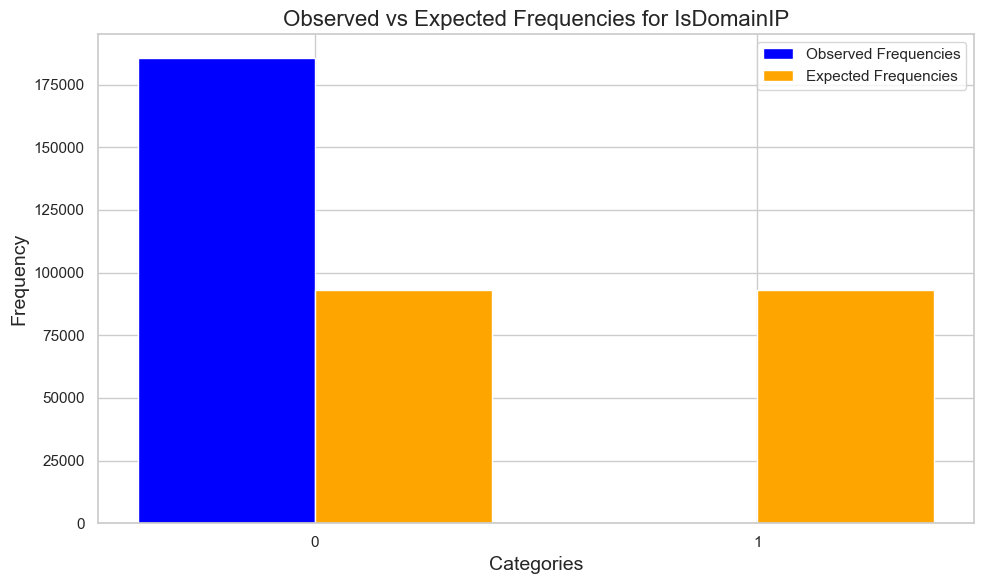

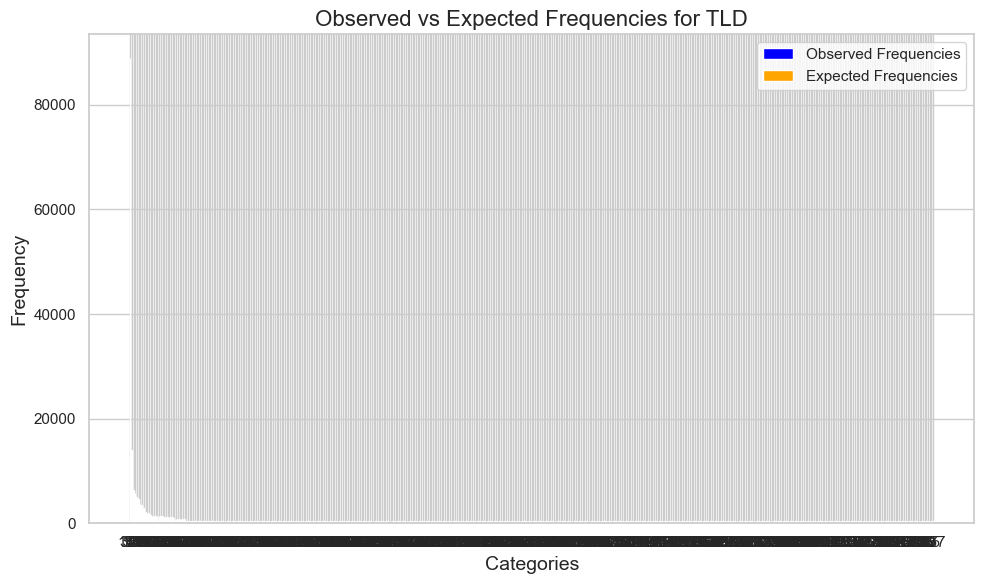

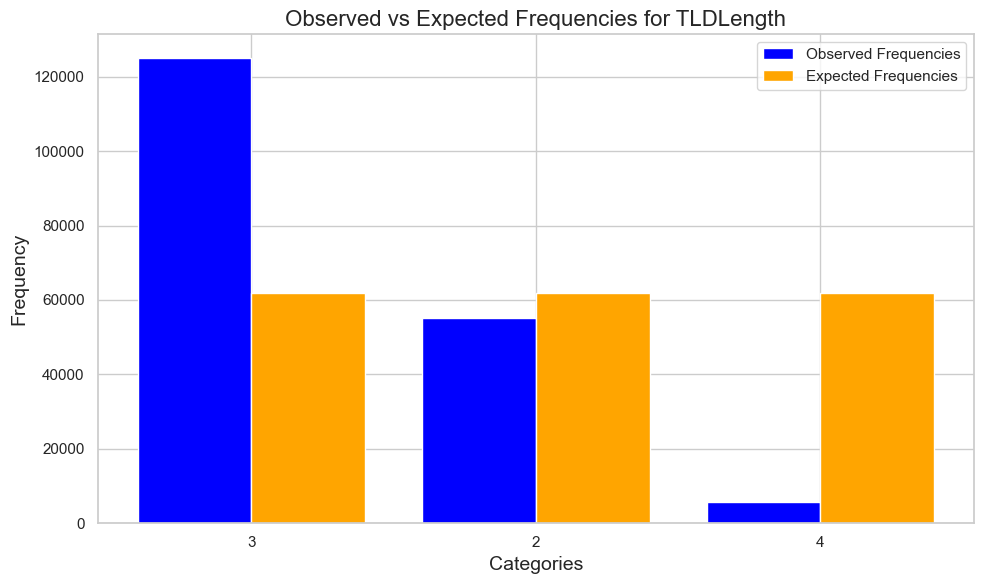

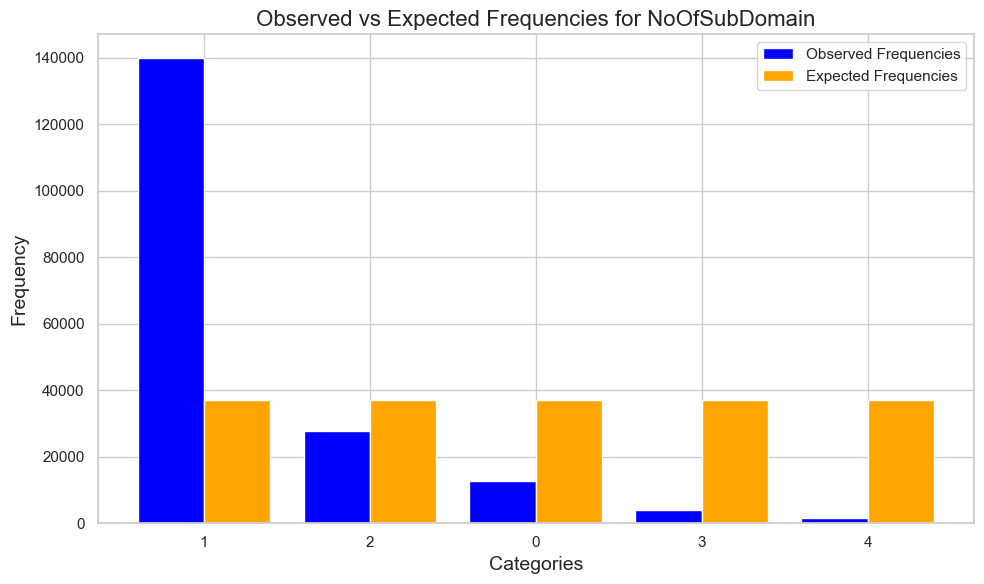

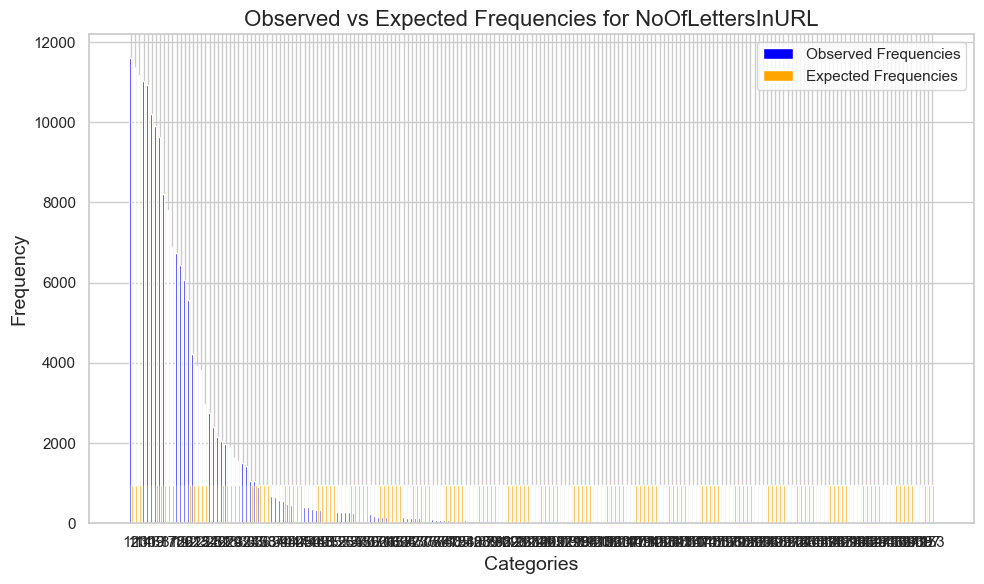

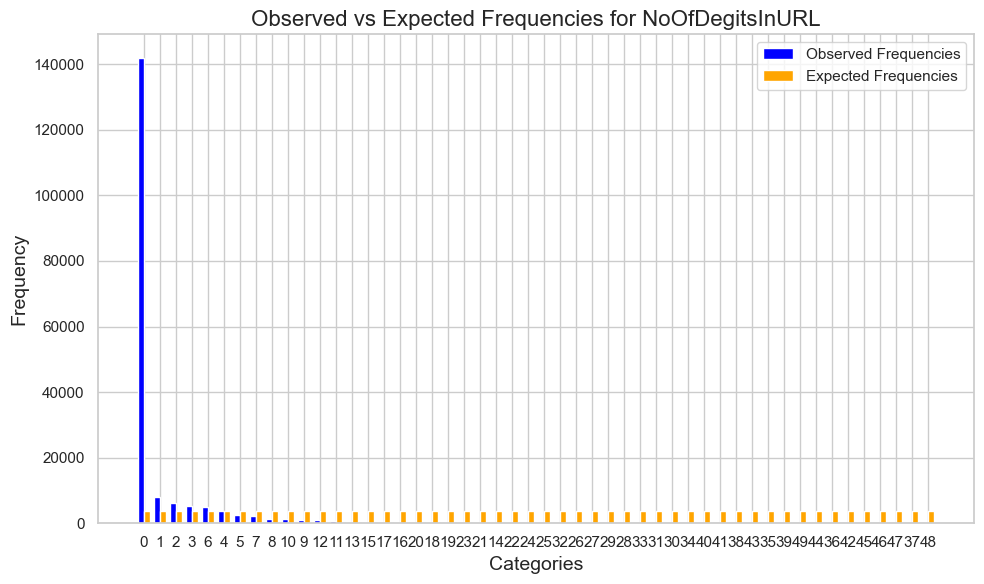

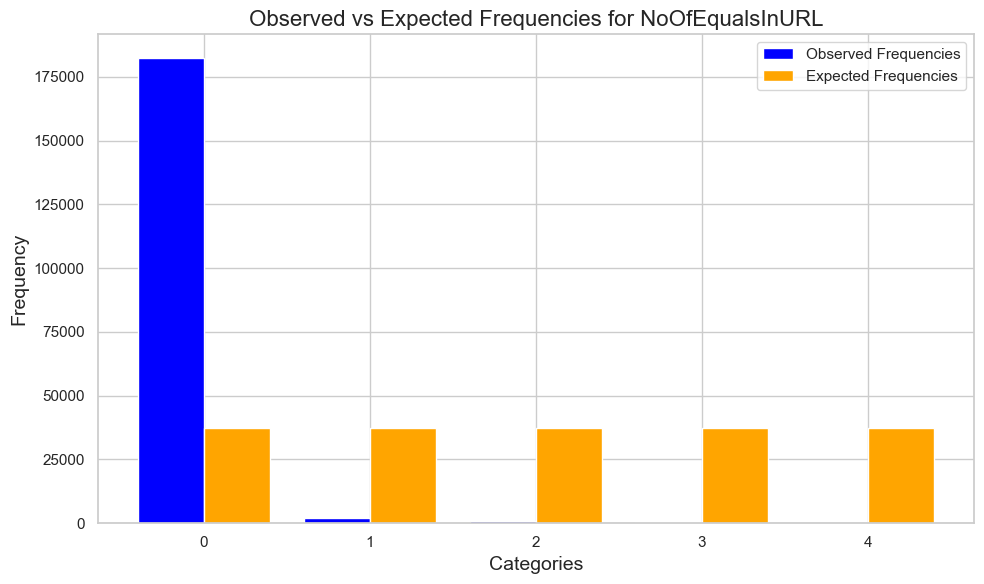

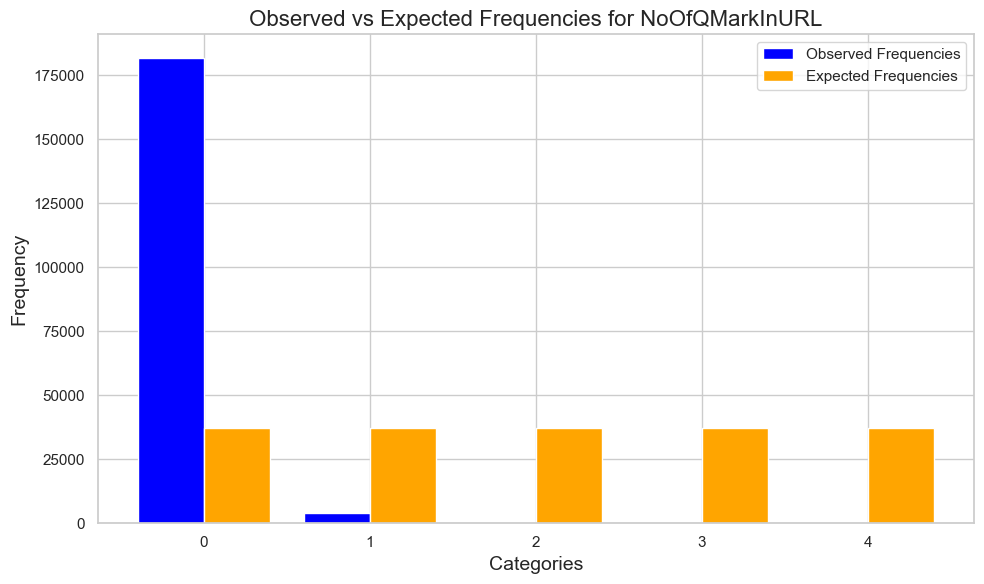

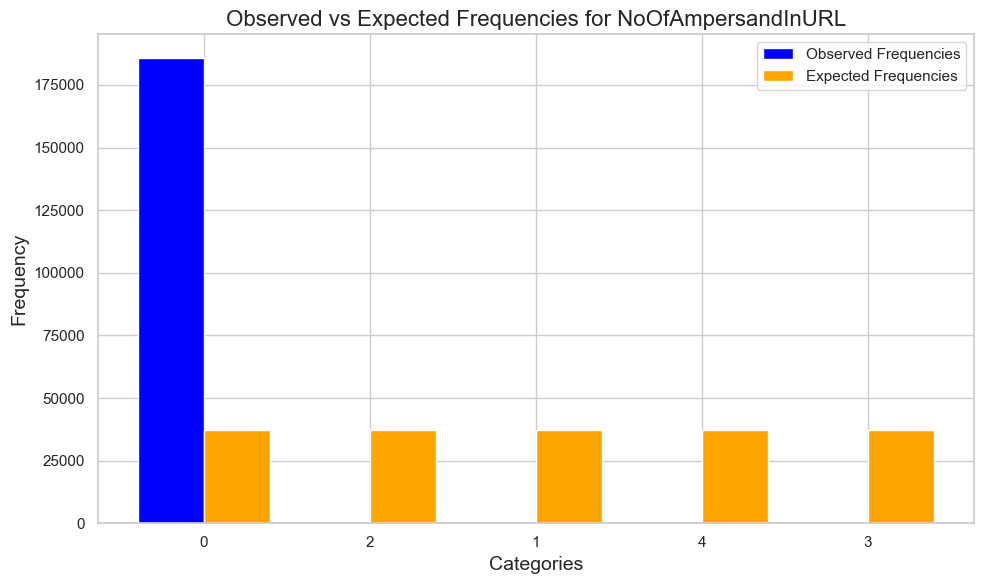

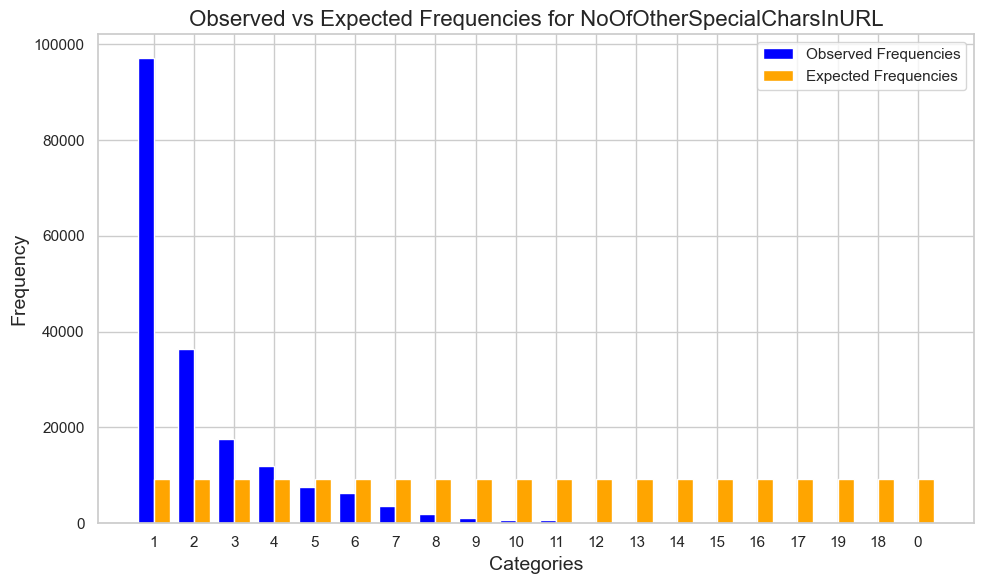

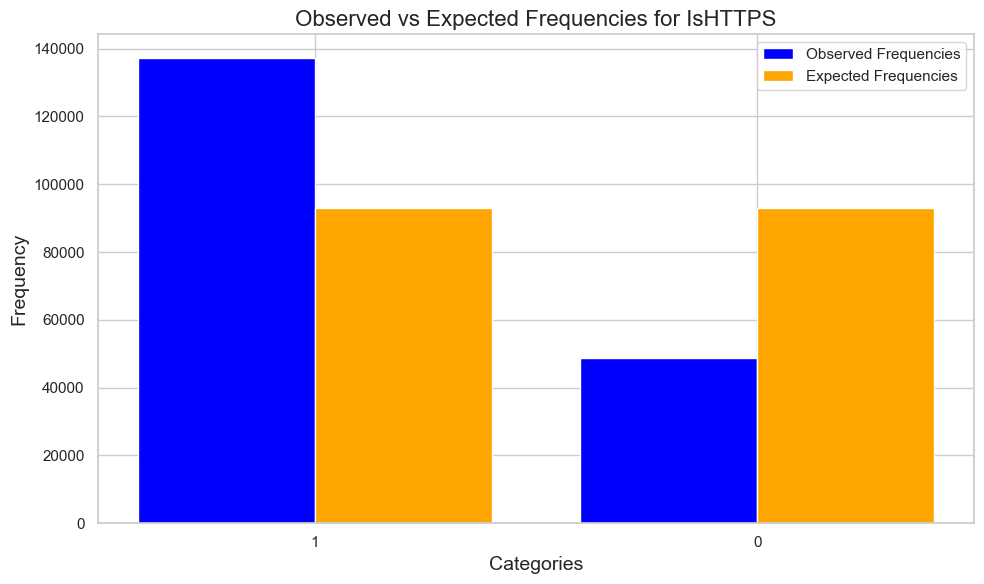

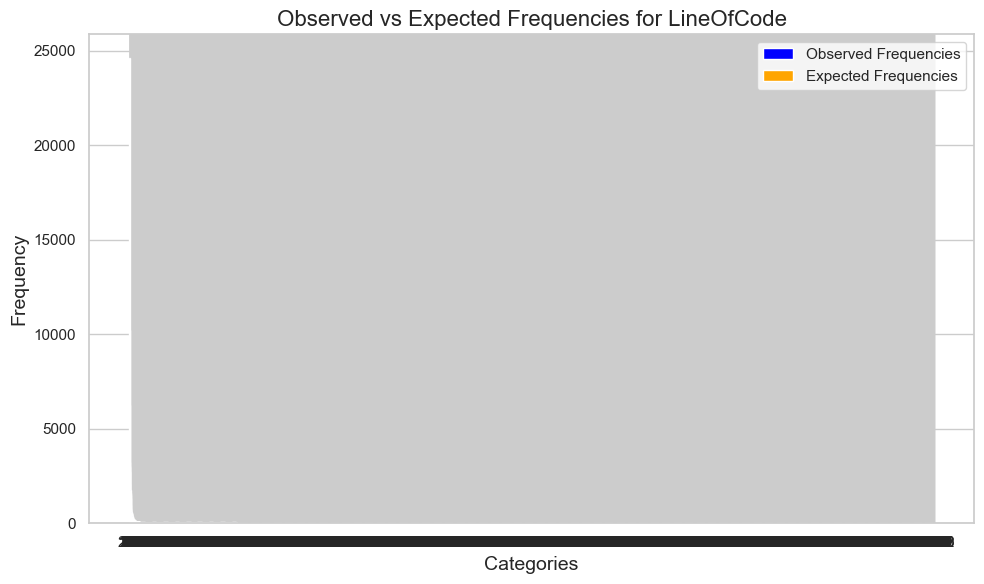

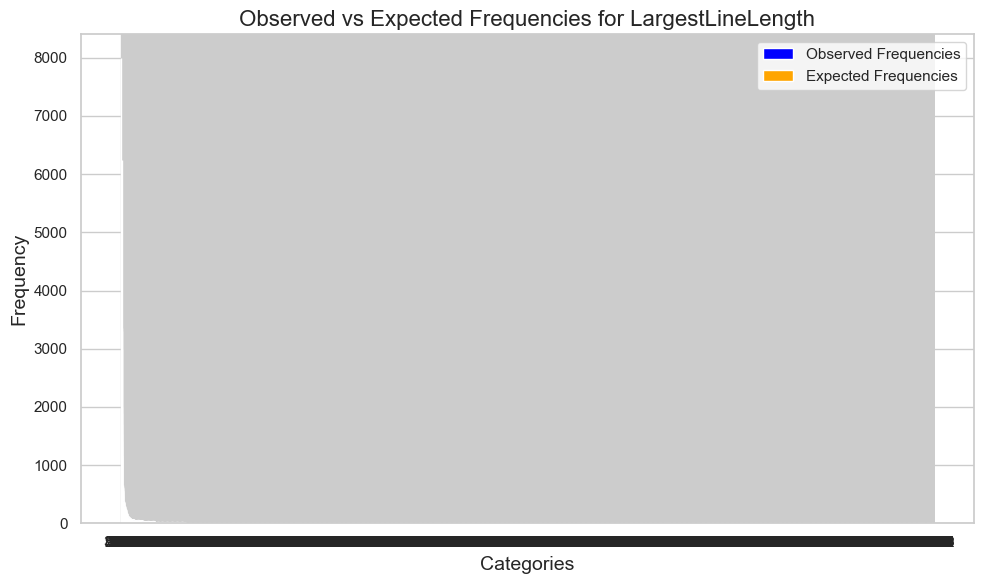

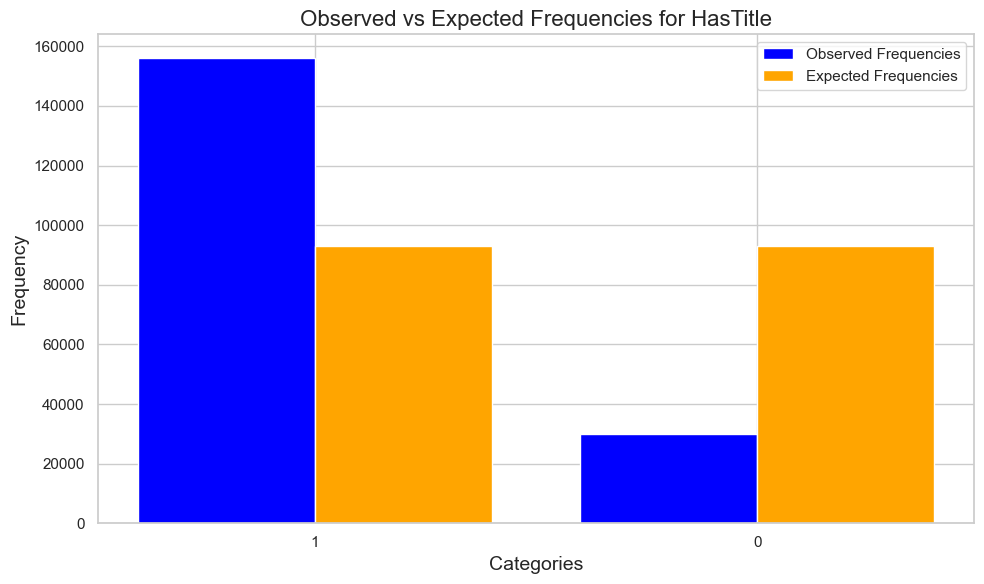

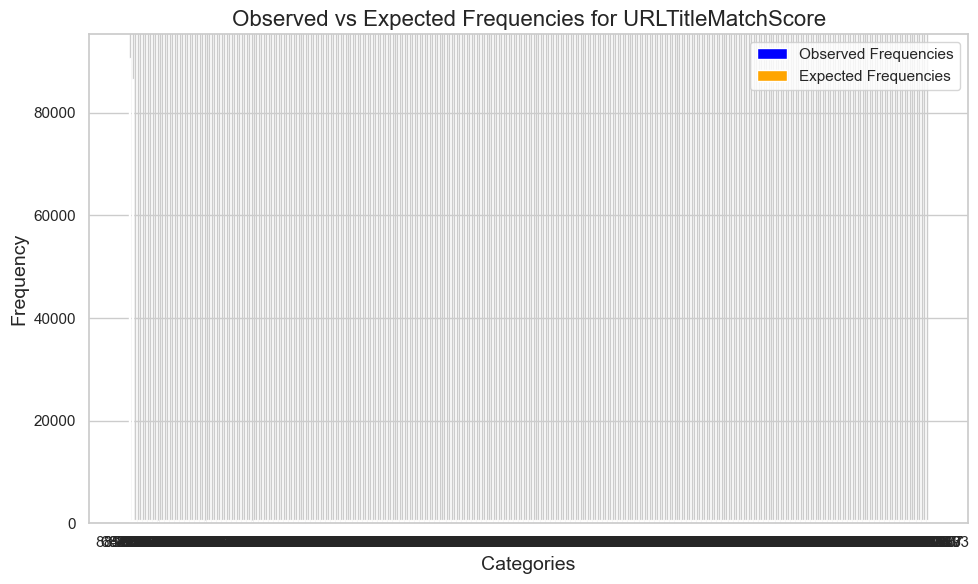

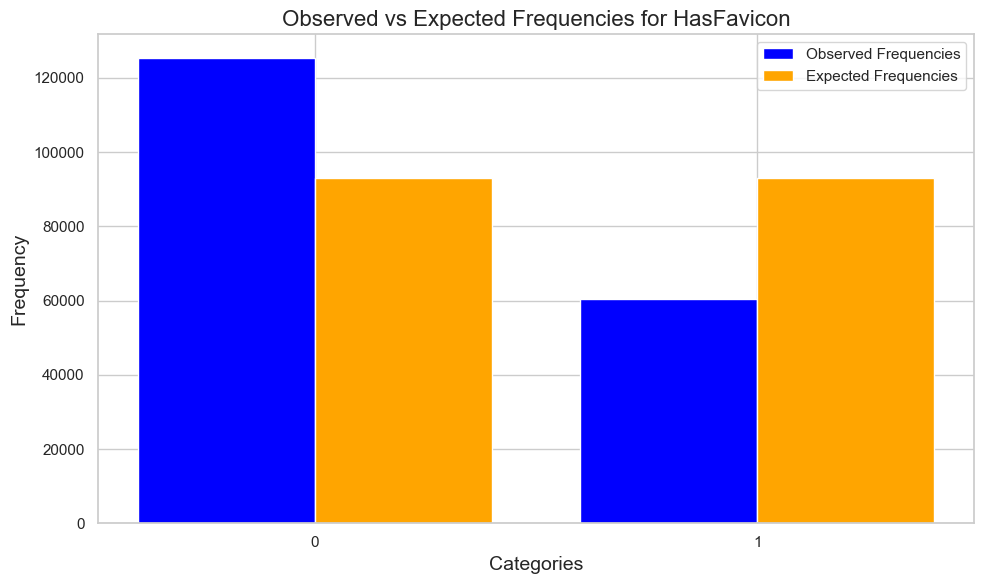

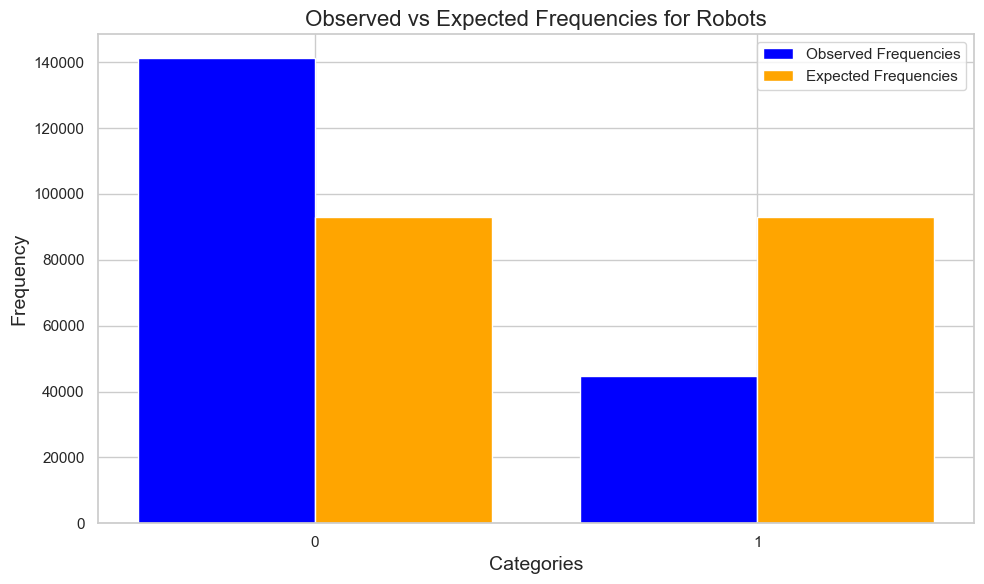

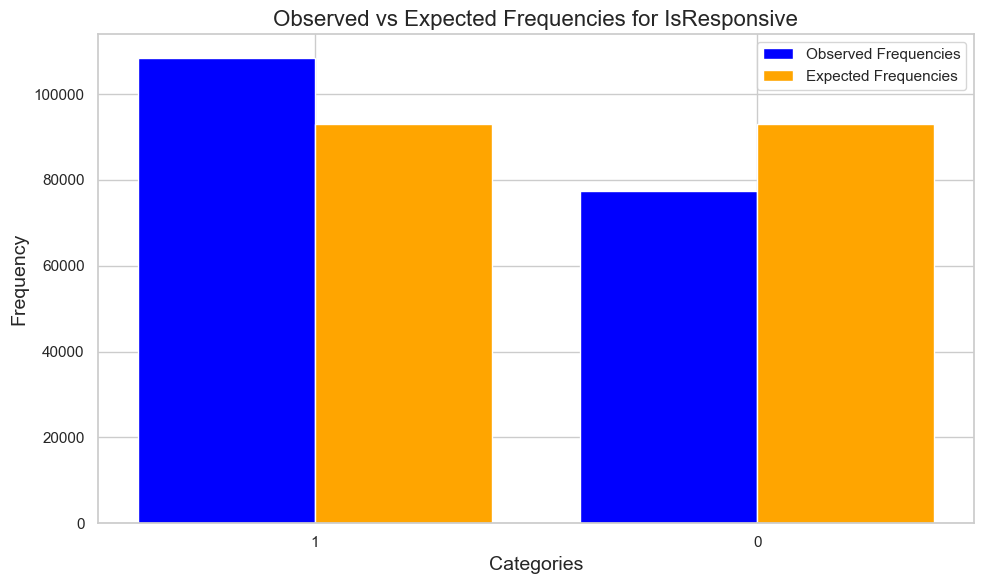

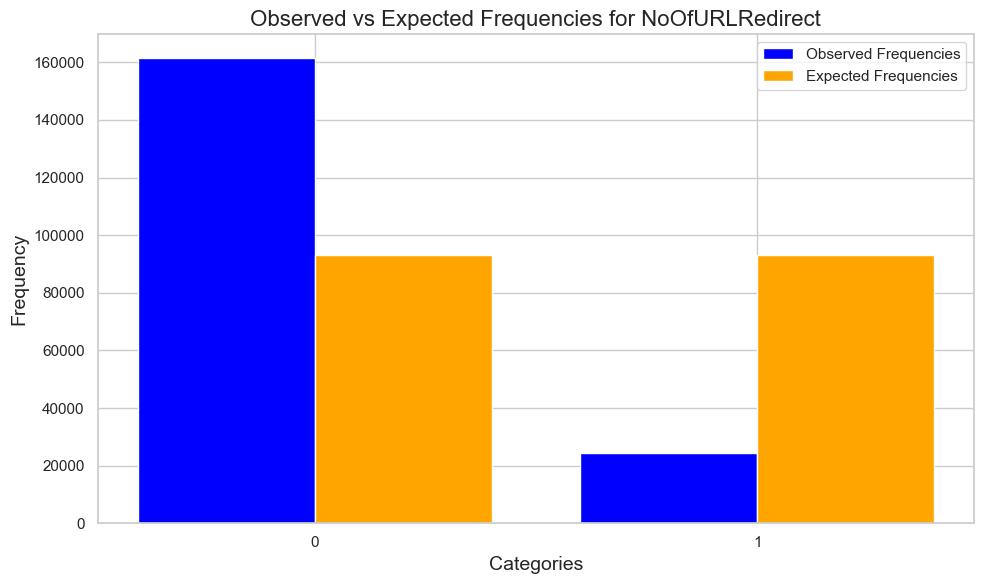

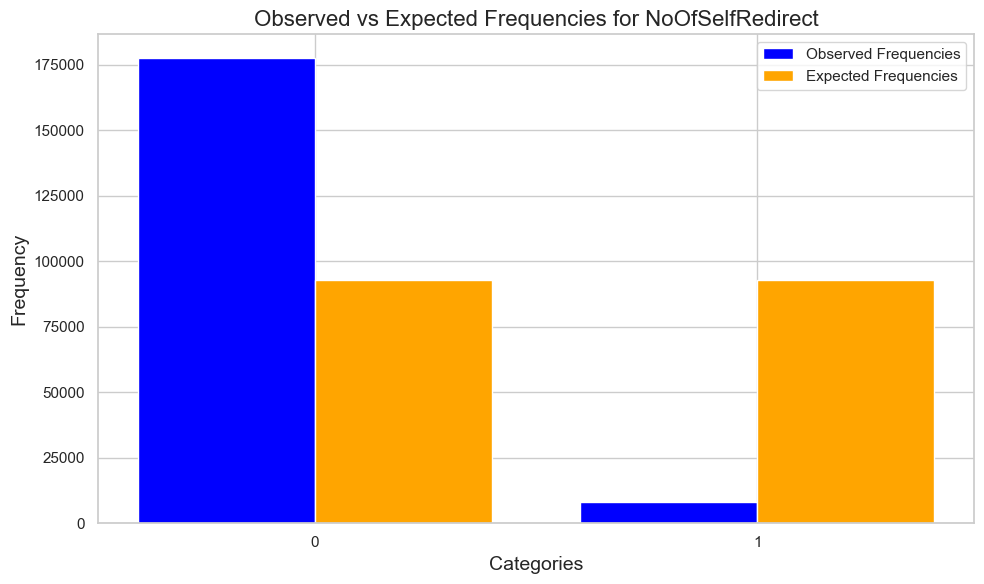

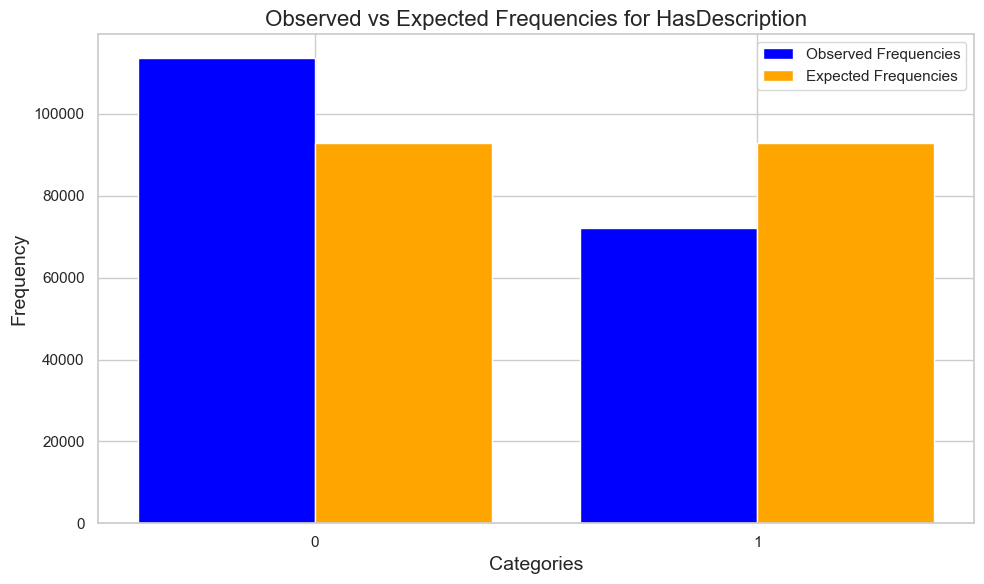

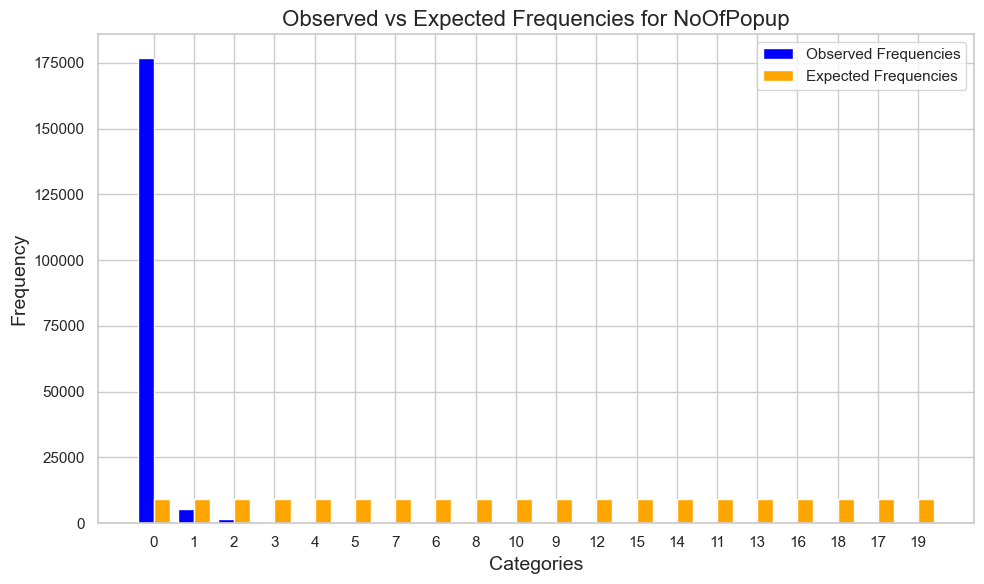

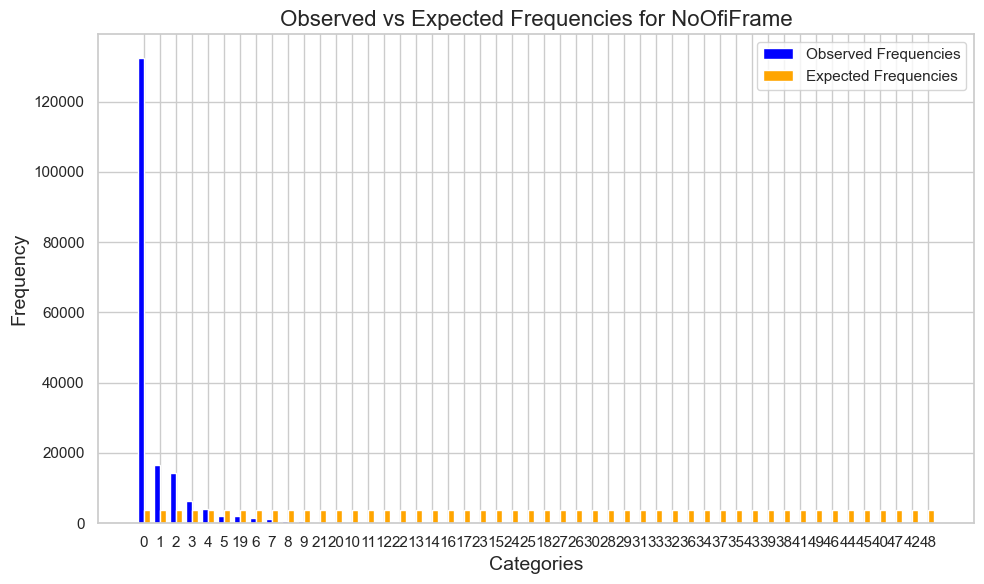

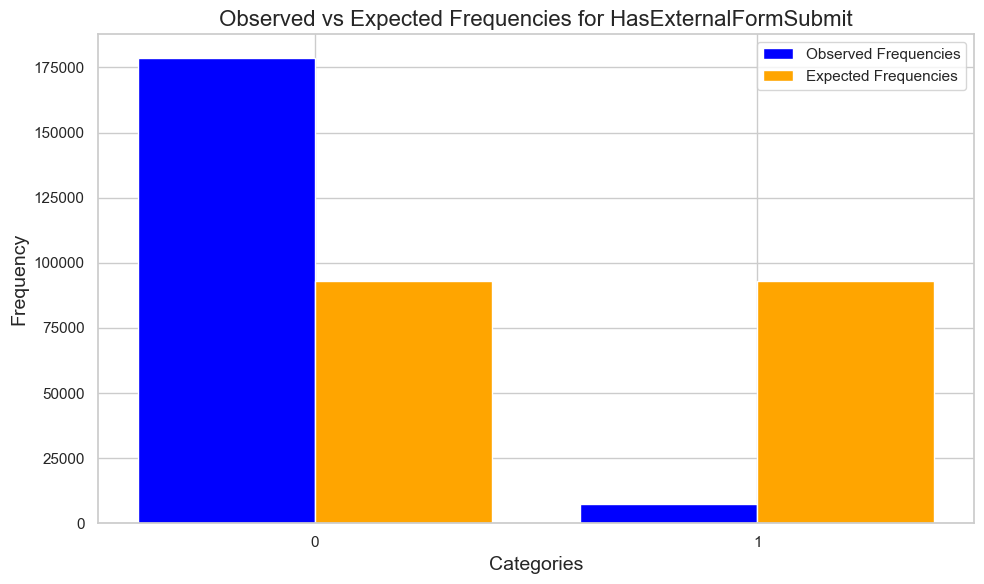

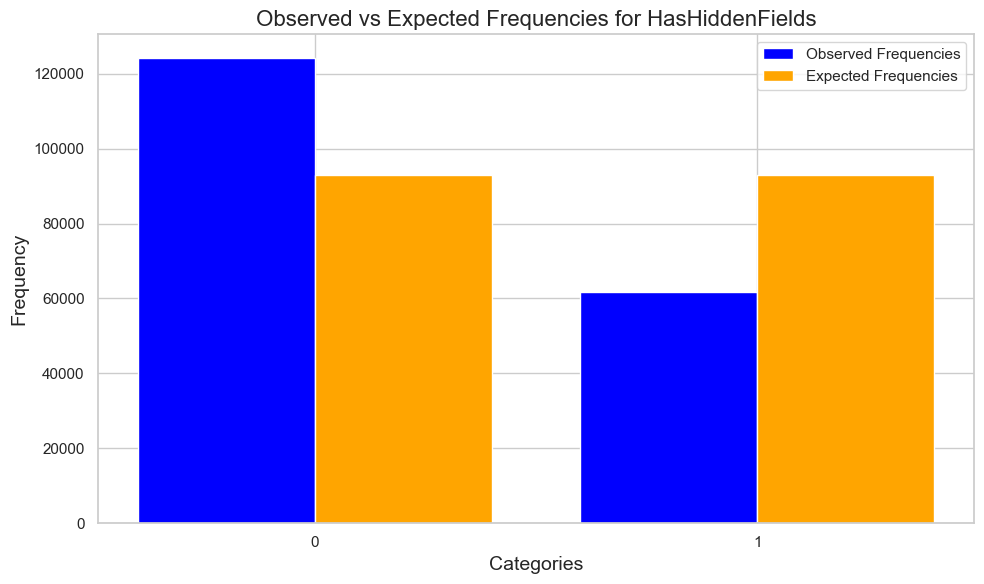

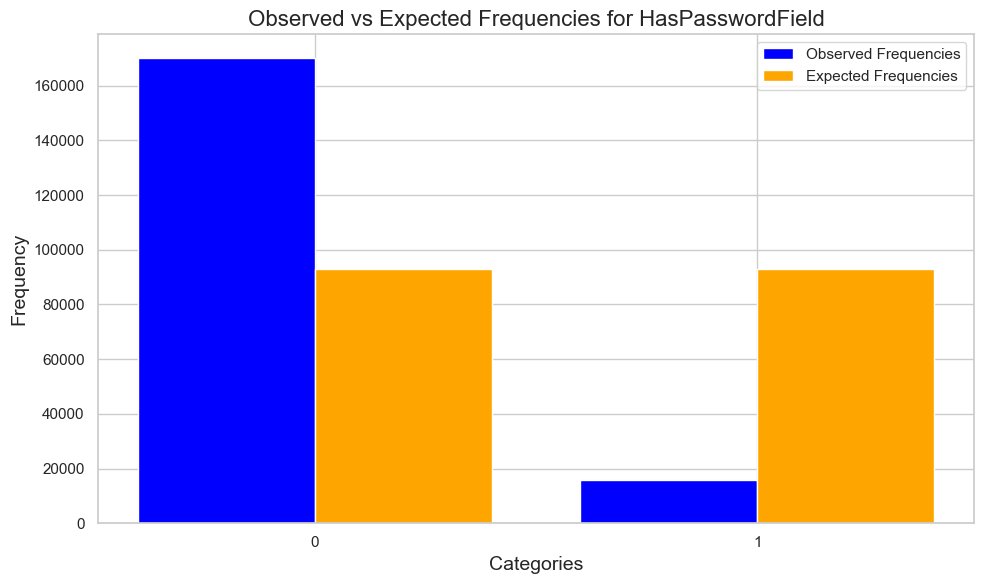

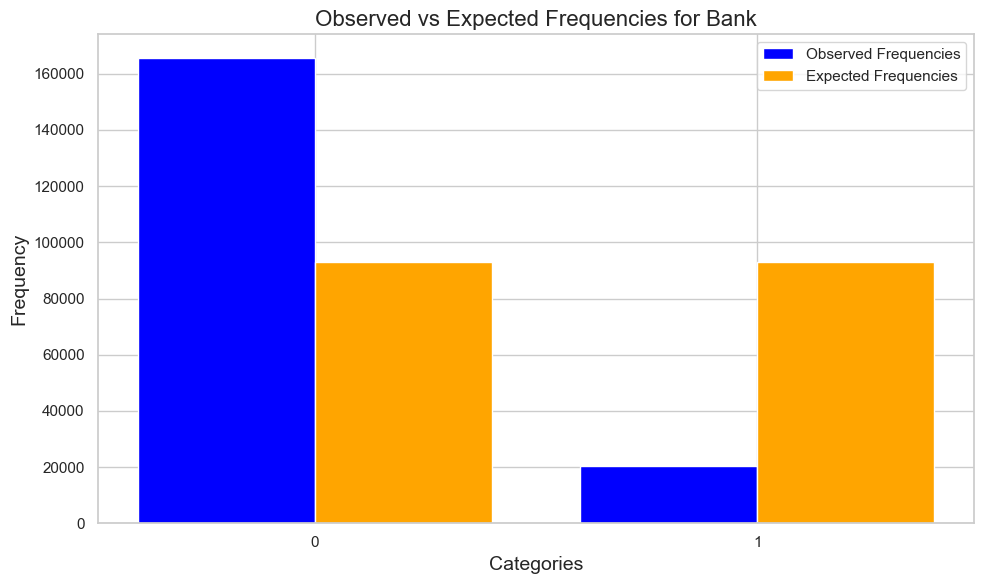

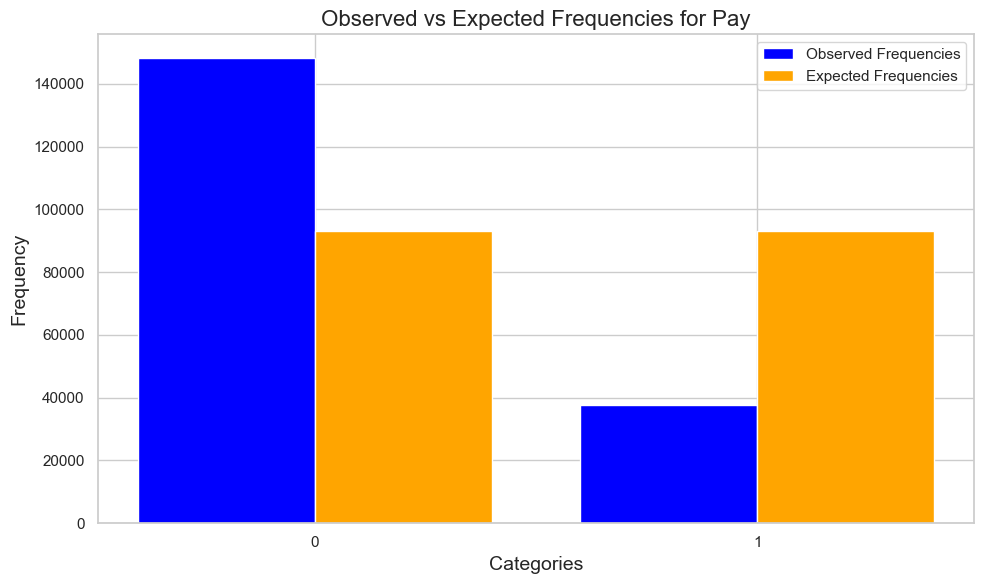

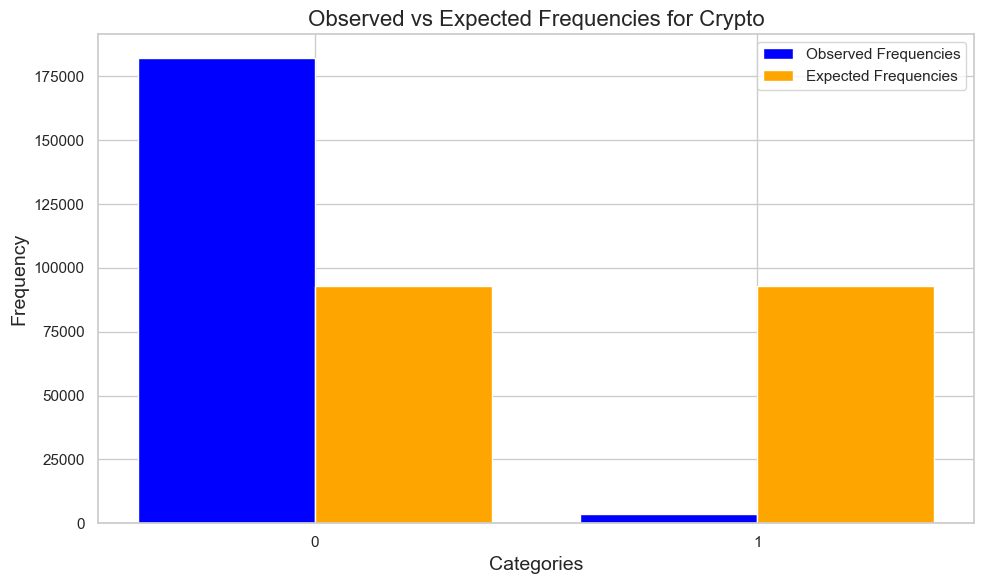

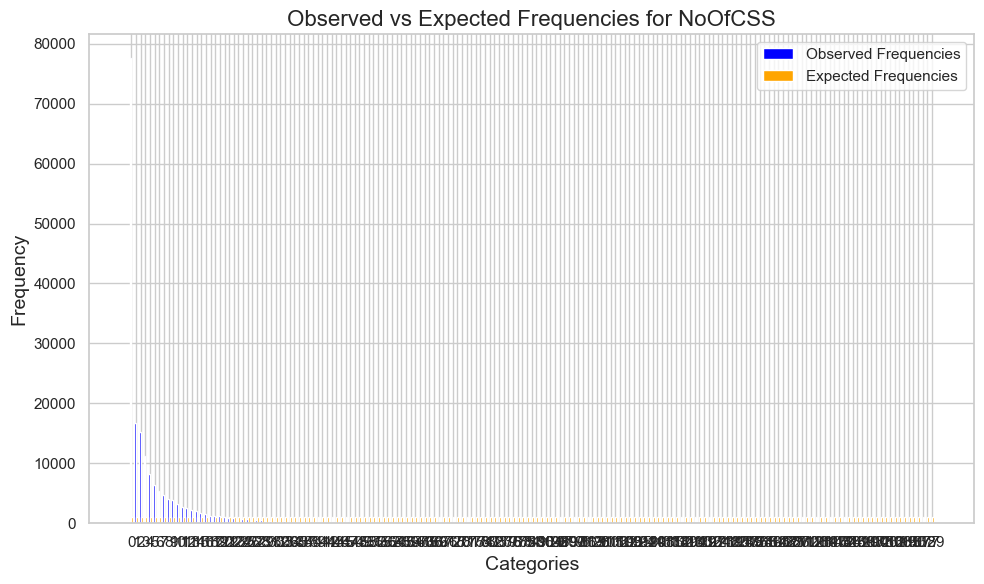

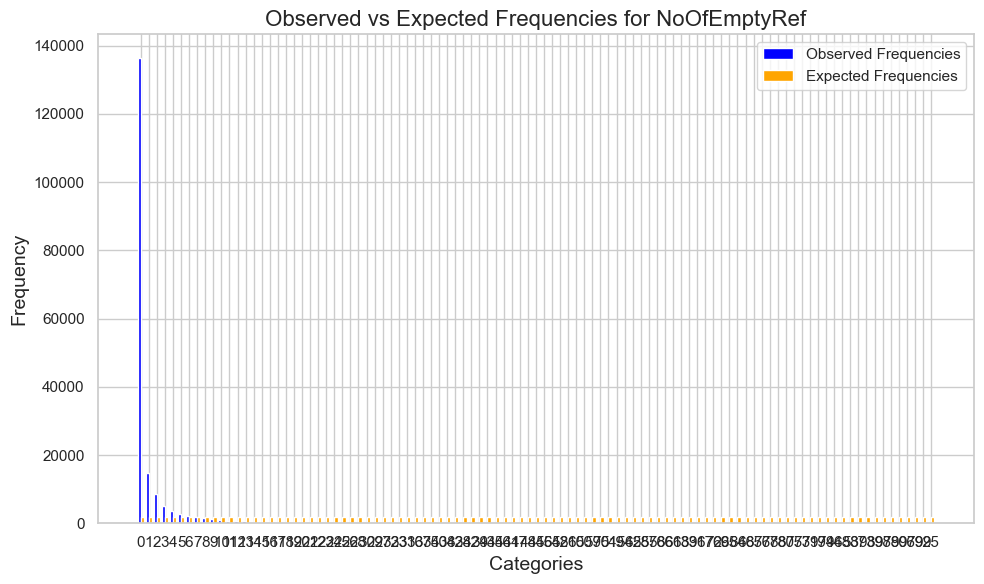

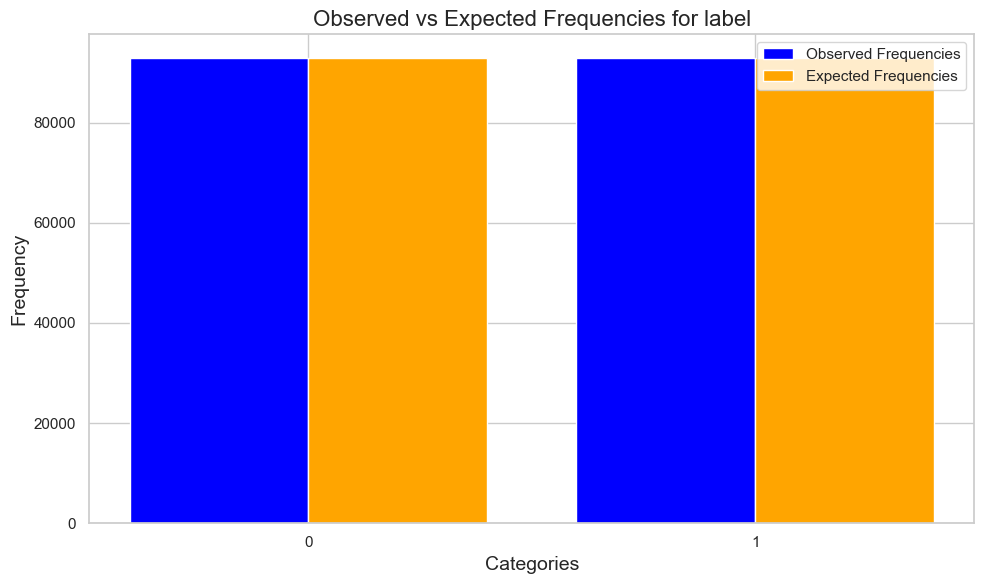

In [38]:
for feature in two_unique_features:
    observed_frequencies = df[feature].value_counts()
    expected_frequencies = np.array([len(df) / len(observed_frequencies)] * len(observed_frequencies))
    
    plt.figure(figsize=(10, 6))
    bar_width = 0.4
    x = np.arange(len(observed_frequencies))

    plt.bar(x - bar_width/2, observed_frequencies, width=bar_width, label='Observed Frequencies', color='blue')
    plt.bar(x + bar_width/2, expected_frequencies, width=bar_width, label='Expected Frequencies', color='orange')

    plt.xticks(x, observed_frequencies.index)
    plt.title(f'Observed vs Expected Frequencies for {feature}', fontsize=16)
    plt.xlabel('Categories', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()
